# Project: Satellite Orbiting Earth Data Analysis by Machine Learning

Contributor: Rajeev Singh Sisodiya

# Objectives:
This project aims to leverage machine learning to extract insights from a comprehensive dataset of Earth-orbiting satellites. The data source will be the Union of Concerned Scientists' (UCS) Satellite Database, which provides in-depth details on over 6,700 operational satellites.

# Data Description:

The UCS Satellite Database offers a wealth of information on each satellite, including:
Country of origin

Purpose (e.g., communication, navigation, Earth observation)
Technical details (mass, power, launch date, expected lifetime)

Orbital characteristics (apogee, perigee, inclination, period)

Ownership, operation, and construction details
Machine Learning Applications:

By applying machine learning algorithms, this project can uncover hidden patterns and relationships within the satellite data. Here are some potential applications:

Predicting satellite behavior: Machine learning models can be trained to predict a satellite's future trajectory, health, or potential collisions.

Identifying satellite types: The model could automatically classify satellites based on their technical specifications, orbit, and purpose.

Understanding satellite trends: Analyzing the data over time can reveal trends in satellite deployment, ownership, and functionalities.

Anomaly detection: Machine learning can identify unusual satellite behavior that might indicate malfunctions or potential threats.
Benefits:

This project's findings can benefit various stakeholders, including:

Space agencies and satellite operators: Improve situational awareness, optimize operations, and enhance space traffic management.

Scientific researchers: Gain insights into the evolving landscape of space exploration and applications.

Policymakers: Develop informed guidelines for sustainable space utilization and address potential security concerns.
Overall, this project by combining the UCS Satellite Database with machine learning holds immense potential for advancing our understanding and management of Earth's orbiting satellites.



# 1. Analysis of Every known satellite orbiting Earth

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv('/content/UCS-Satellite-Database-Officialname-1-1-2023.csv', encoding='latin-1')
df2 = pd.read_csv('/content/UCS-Satellite-Database-Officialname-1-1-2023.csv', encoding='latin-1')

In [5]:
columns1 = df1.columns
columns2 = df2.columns

In [6]:
columns_to_remove1 = []
columns_to_remove2 = []

In [7]:
for column in columns1:
    columns_to_remove1.append(column) if df1[column].isnull().sum() >= 0.9*len(df1) else None

In [8]:
for column in columns2:
    columns_to_remove2.append(column) if df2[column].isnull().sum() >= 0.9*len(df2) else None

In [9]:
df1 = df1.drop(columns=columns_to_remove1)
df2 = df2.drop(columns=columns_to_remove2)

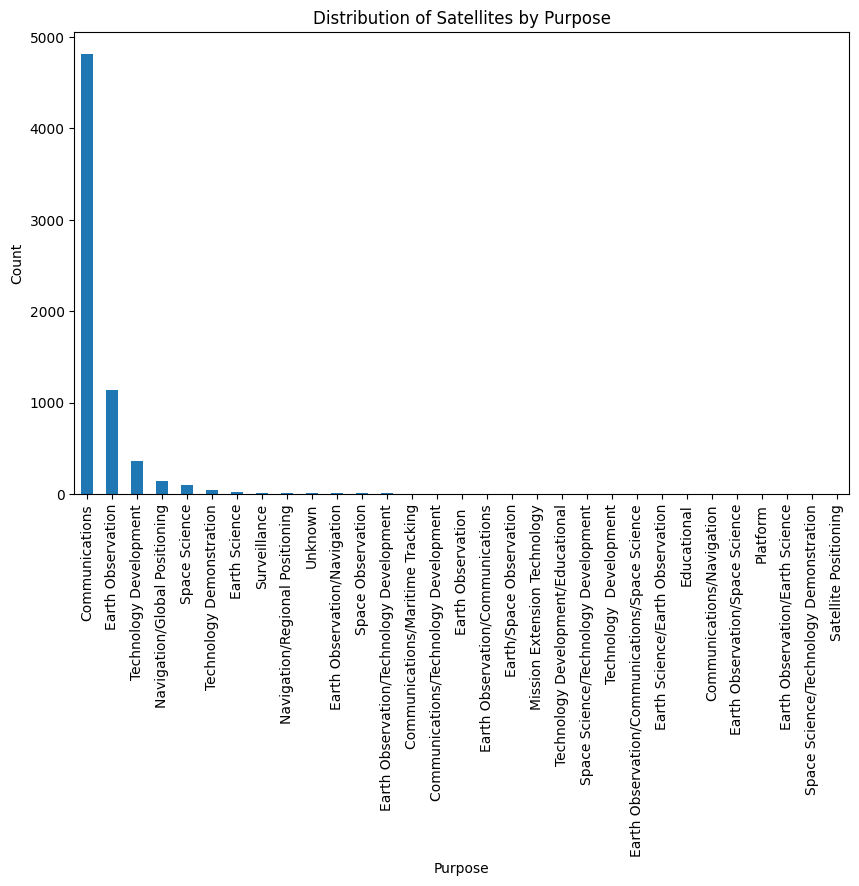

In [10]:
plt.figure(figsize=(10, 6))
df1['Purpose'].value_counts().plot(kind='bar')
plt.title('Distribution of Satellites by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

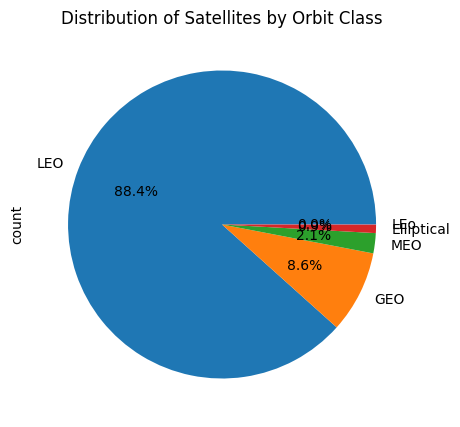

In [11]:
plt.figure(figsize=(8, 5))
df1['Class of Orbit'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Satellites by Orbit Class')
plt.show()

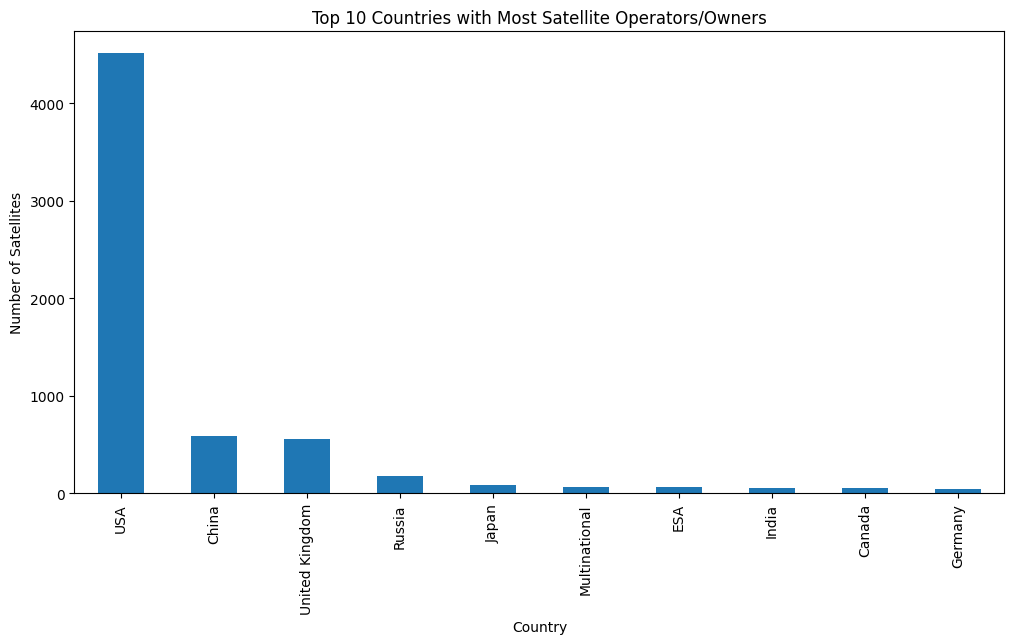

In [12]:
plt.figure(figsize=(12, 6))
df1['Country of Operator/Owner'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries with Most Satellite Operators/Owners')
plt.xlabel('Country')
plt.ylabel('Number of Satellites')
plt.show()


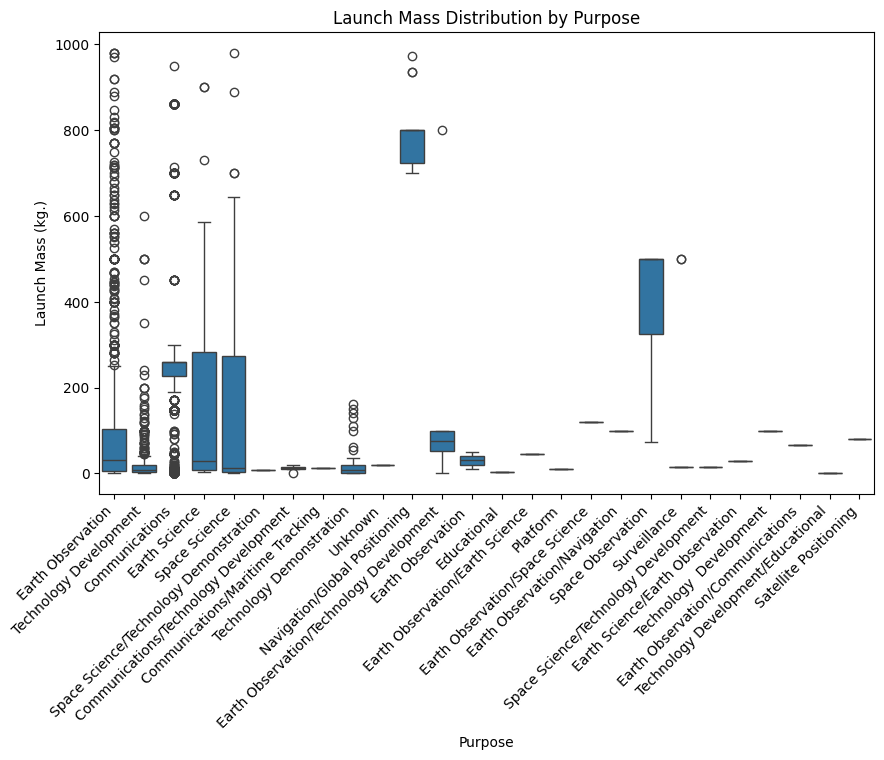

In [13]:
# Convert 'Launch Mass (kg.)' column to numeric if it's not already in numeric format
df1['Launch Mass (kg.)'] = pd.to_numeric(df1['Launch Mass (kg.)'], errors='coerce')

# Drop rows with missing launch mass data
df1.dropna(subset=['Launch Mass (kg.)'], inplace=True)

# Create boxplot: Launch Mass Distribution by Purpose
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purpose', y='Launch Mass (kg.)', data=df1)
plt.title('Launch Mass Distribution by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Launch Mass (kg.)')
plt.xticks(rotation=45, ha='right')
plt.show()

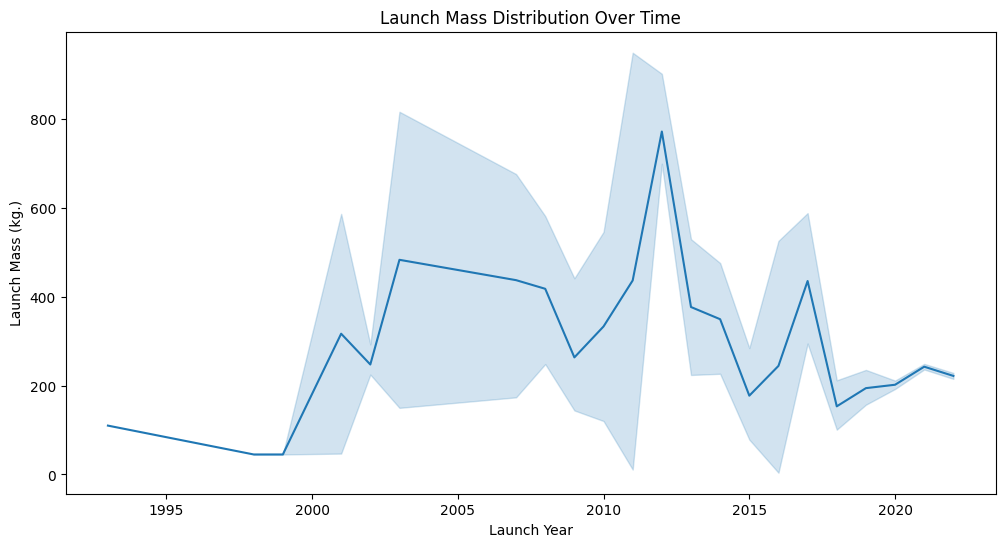

In [14]:
# Convert 'Date of Launch' column to datetime format, inferring the date format
df1['Date of Launch'] = pd.to_datetime(df1['Date of Launch'], errors='coerce', infer_datetime_format=True)

# Extract year from launch date
df1['Launch Year'] = df1['Date of Launch'].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(x='Launch Year', y='Launch Mass (kg.)', data=df1)
plt.title('Launch Mass Distribution Over Time')
plt.xlabel('Launch Year')
plt.ylabel('Launch Mass (kg.)')
plt.show()

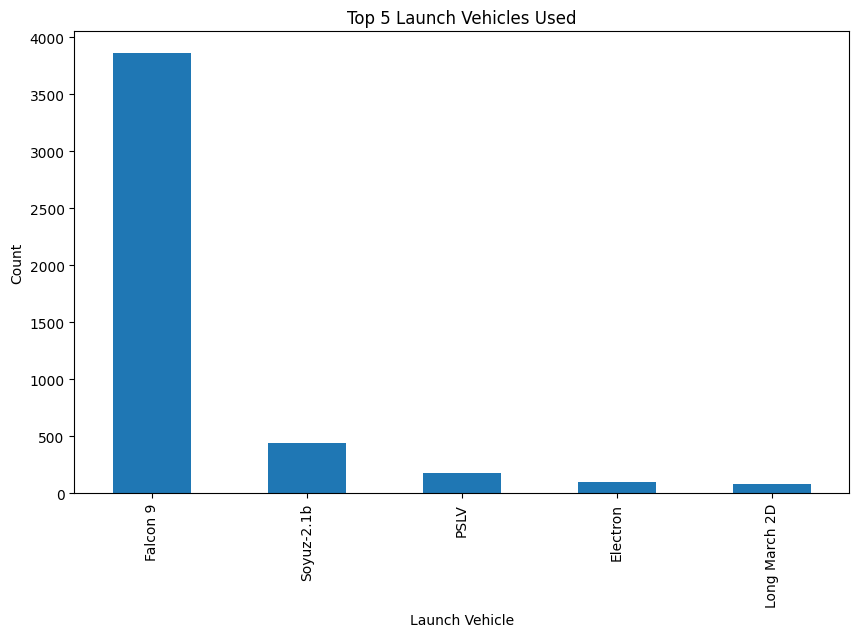

In [15]:
plt.figure(figsize=(10, 6))
top_vehicles = df1['Launch Vehicle'].value_counts().head(5)
top_vehicles.plot(kind='bar')
plt.title('Top 5 Launch Vehicles Used')
plt.xlabel('Launch Vehicle')
plt.ylabel('Count')
plt.show()

# 2. Earth Satellites | EDA + RandomForest for lifetime

In [16]:
df = pd.read_csv('/content/UCS-Satellite-Database-1-1-2023.csv', encoding='latin-1')
df.columns

Index(['Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 28',
       'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2',
       'Source.3', 'Source.4', 'Source.5', 'Source.6', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',


In [17]:
df_official_names = pd.read_csv('/content/UCS-Satellite-Database-Officialname-1-1-2023.csv',
                               encoding = 'latin-1')
df_official_names.columns

Index(['Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 27',
       'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2',
       'Source.3', 'Source.4', 'Source.5', 'Source.6', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed

In [18]:
df_merged = df.merge(df_official_names, how='outer')
duplicates = df_merged.duplicated()
duplicates.sum()

0

In [19]:
df = df_merged

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

Name of Satellite, Alternate Names  \
0  1HOPSAT-TD (1st-generation High Optical Perfor...   
1                                           Aalto-1    
2                                              AAt-4   
3                           ABS-2 (Koreasat-8, ST-3)   
4                                             ABS-2A   

  Current Official Name of Satellite Country/Org of UN Registry  \
0                         1HOPSAT-TD                         NR   
1                            Aalto-1                    Finland   
2                              AAt-4                    Denmark   
3                              ABS-2                         NR   
4                             ABS-2A                         NR   

  Country of Operator/Owner                 Operator/Owner       Users  \
0                       USA                   Hera Systems  Commercial   
1                   Finland               Aalto University       Civil   
2                   Denmark          University of Aalborg       Civil   
3             Multinational  Asia Broadcast Satellite Ltd.  Commercial   
4             Multinational  Asia Broadcast Satellite Ltd.  Commercial   

                  Purpose                       Detailed Purpose  \
0       Earth Observation                       Infrared Imaging   
1  Technology Development                                    NaN   
2       Earth Observation  Automatic Identification System (AIS)   
3          Communications                                    NaN   
4          Communications                                    NaN   

  Class of Orbit       Type of Orbit  Longitude of GEO (degrees) Perigee (km)  \
0            LEO  Non-Polar Inclined                         0.0          566   
1            LEO     Sun-Synchronous                         0.0          497   
2            LEO     Sun-Synchronous                         0.0          442   
3            GEO                 NaN                        75.0       35,778   
4            GEO                 NaN                       -75.0       35,700   

  Apogee (km)  Eccentricity Inclination (degrees) Period (minutes)  \
0         576      0.001510                  36.9            96.08   
1         517      0.001450                 97.45             94.7   
2         687      0.001510                  98.2             95.9   
3      35,793      0.000178                  0.08          1436.03   
4      35,700      0.000000                     0           1436.1   

  Launch Mass (kg.)  Dry Mass (kg.)  Power (watts) Date of Launch  \
0                22              NaN           NaN     11-12-2019   
1                 5              NaN          4.50     23-06-2017   
2                 1              NaN           NaN     25-04-2016   
3             6,330              NaN     16,000.00     06-02-2014   
4             1,800              NaN           NaN     15-06-2016   

   Expected Lifetime (yrs.)                Contractor Country of Contractor  \
0                       0.5              Hera Systems                   USA   
1                       2.0          Aalto University               Finland   
2                       NaN     University of Aalborg               Denmark   
3                      15.0       Space Systems/Loral                   USA   
4                      15.0  Boeing Satellite Systems                   USA   

                  Launch Site Launch Vehicle COSPAR Number  NORAD Number  \
0  Satish Dhawan Space Centre           PSLV     2019-089H         44859   
1  Satish Dhawan Space Centre           PSLV     2017-036L         42775   
2         Guiana Space Center     Soyuz-2.1a     2016-025E         41460   
3         Guiana Space Center   Ariane 5 ECA     2014-006A         39508   
4              Cape Canaveral       Falcon 9     2016-038A         41588   

                                            Comments Unnamed: 28  \
0  Pathfinder for planned earth observation const...         NaN   
1              Technology develop

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6721 entries, 0 to 6720
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6721 non-null   object 
 2   Country/Org of UN Registry          6721 non-null   object 
 3   Country of Operator/Owner           6721 non-null   object 
 4   Operator/Owner                      6721 non-null   object 
 5   Users                               6721 non-null   object 
 6   Purpose                             6721 non-null   object 
 7   Detailed Purpose                    1168 non-null   object 
 8   Class of Orbit                      6721 non-null   object 
 9   Type of Orbit                       6079 non-null   object 
 10  Longitude of GEO (degrees)          6719 non-null   float64
 11  Perigee (km)                        6721 no

In [22]:
df = df.iloc[:, :25].reset_index()

In [23]:
df.columns

Index(['index', 'Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle'],
      dtype='object')

In [24]:
# converting some string formatted features to numeric
df.rename(columns={' Dry Mass (kg.) ':'Dry Mass (kg.)'}, inplace=True)
numeric_features = ['Period (minutes)', 'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)']

for feature in numeric_features:
    df[feature] = pd.to_numeric(df[feature].replace(',', '', regex=True), errors='coerce')

In [25]:
# checking nan values
nan_values = df.isna().sum()
print(nan_values)

index                                    0
Name of Satellite, Alternate Names       3
Current Official Name of Satellite       0
Country/Org of UN Registry               0
Country of Operator/Owner                0
Operator/Owner                           0
Users                                    0
Purpose                                  0
Detailed Purpose                      5553
Class of Orbit                           0
Type of Orbit                          642
Longitude of GEO (degrees)               2
Perigee (km)                             0
Apogee (km)                              0
Eccentricity                             0
Inclination (degrees)                    0
Period (minutes)                        44
Launch Mass (kg.)                      243
Dry Mass (kg.)                        6280
Power (watts)                         6163
Date of Launch                           0
Expected Lifetime (yrs.)              1915
Contractor                               0
Country of 

In [26]:
# removing nan values
for feature in df.columns:
    if df[feature].dtype =='object':
        df[feature].fillna(method='ffill', inplace = True)
    else:
        df[feature].fillna(df[feature].mean(), inplace=True)

In [27]:
df.isna().sum()

index                                 0
Name of Satellite, Alternate Names    0
Current Official Name of Satellite    0
Country/Org of UN Registry            0
Country of Operator/Owner             0
Operator/Owner                        0
Users                                 0
Purpose                               0
Detailed Purpose                      0
Class of Orbit                        0
Type of Orbit                         0
Longitude of GEO (degrees)            0
Perigee (km)                          0
Apogee (km)                           0
Eccentricity                          0
Inclination (degrees)                 0
Period (minutes)                      0
Launch Mass (kg.)                     0
Dry Mass (kg.)                        0
Power (watts)                         0
Date of Launch                        0
Expected Lifetime (yrs.)              0
Contractor                            0
Country of Contractor                 0
Launch Site                           0


In [28]:
"""
EDA questions
1.What are the unique countries or organizations listed in the "Country/Org of UN Registry" column?
2.How many satellites have a specified value in the "Detailed Purpose" column, and what are the top three most common values?
3.What is the distribution of satellite launch years in the "Date of Launch" column?
4.Can you identify the top three countries with the highest number of satellites in orbit?
5.Explore the "Class of Orbit" column and determine the number of satellites in each orbit class.
6.Analyze the distribution of "Launch Mass (kg)" and identify any outliers.
7.Is there a correlation between the "Power (watts)" and "Expected Lifetime (yrs.)" columns? Visualize this relationship.
8.Identify the satellites with the longest and shortest periods in orbit. Visualize the satellite periods in orbit for each orbit.
9.Can you create a model to predict the "Expected Lifetime (yrs.)" based on other relevant features in the dataset?
"""

'\nEDA questions\n1.What are the unique countries or organizations listed in the "Country/Org of UN Registry" column?\n2.How many satellites have a specified value in the "Detailed Purpose" column, and what are the top three most common values?\n3.What is the distribution of satellite launch years in the "Date of Launch" column?\n4.Can you identify the top three countries with the highest number of satellites in orbit?\n5.Explore the "Class of Orbit" column and determine the number of satellites in each orbit class.\n6.Analyze the distribution of "Launch Mass (kg)" and identify any outliers.\n7.Is there a correlation between the "Power (watts)" and "Expected Lifetime (yrs.)" columns? Visualize this relationship.\n8.Identify the satellites with the longest and shortest periods in orbit. Visualize the satellite periods in orbit for each orbit.\n9.Can you create a model to predict the "Expected Lifetime (yrs.)" based on other relevant features in the dataset?\n'

In [29]:
# 1.What are the unique countries or organizations listed in the "Country/Org of UN Registry" column?
unique_countries = df['Country/Org of UN Registry'].unique()
print(*sorted( unique_countries ), sep=', ')

Algeria, Argentina, Australia, Austria, Azerbaijan, Belarus, Belgium, Bolivia, Brazil, Canada, Chia, Chile, China, China/Sri Lanka, Colombia, Czech Republic, Denmark, ESA, EUMETSAT, EUMETSAT/ESA, Egypt, Ethiopia, Finland, France, Germany, Greece, Inda, India, Indonesia, Iraq, Israel, Italy, Japan, Kazakhstan, Laos, Lithuania, Luxembourg, Malaysia, Mexico, NR, NR , NR  (12/22), NR (1/22), NR (12/20), NR (12/21), NR (12/22), NR (4/22), NR (5/21), NR (9/21), NR (9/22), NR (9_22), NR(9/22), New Zealand, Nigeria, Norway, Pakistan, Peru, Russia, Saudi Arabia, South Africa, South Korea, Spain, Sweden, Thailand, Turkey, USA, United Arab Emirates, United Kingdom, Uruguay, Venezuela


In [30]:
# 2.How many satellites have a specified value in the "Detailed Purpose" column, and what are the top three most common values?
number_of_satellites_with_purpose= df['Detailed Purpose'].notna().count()
print(f"Numbef of satellites with purpose are: {number_of_satellites_with_purpose}")

top_three_purposes = df['Detailed Purpose'].value_counts().head(3)
top_three_purposes

Numbef of satellites with purpose are: 6721


Detailed Purpose
Optical Imaging            4925
Earth Science               369
Electronic Intelligence     258
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='Count'>

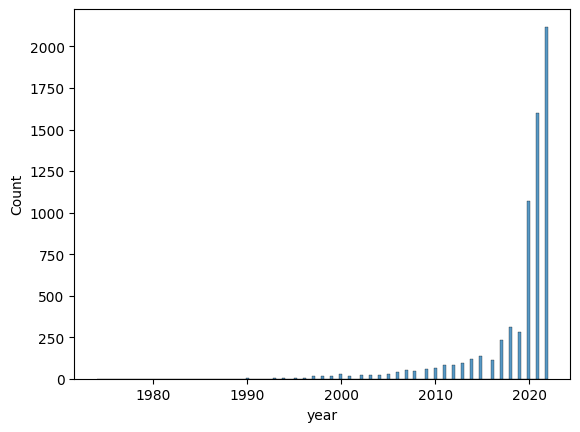

In [31]:
# 3.What is the distribution of satellite launch years in the "Date of Launch" column?
from dateutil import parser
import seaborn as sns

df['year'] = df['Date of Launch'].apply(lambda x: parser.parse(x).year)
filtered_years = df[(df['year']>=1900) & (df['year']<=2023)]
sns.histplot(filtered_years, x='year')

In [32]:
# 4.Can you identify the top three countries with the highest number of satellites in orbit?
df['Country of Operator/Owner'].unique()

array(['USA', 'Finland', 'Denmark', 'Multinational', 'Israel', 'ESA',
       'Lithuania', 'Norway', 'Spain', 'United Arab Emirates', 'Algeria',
       'Japan', 'Brazil', 'Kazakhstan', 'Russia', 'South Korea', 'Angola',
       'Canada', 'Argentina', 'USA/Argentina', 'China', 'Belgium',
       'Turkey', 'Luxembourg', 'Switzerland', 'India', 'France/Italy',
       'Singapore', 'Azerbaijan', 'Bangladesh', 'Czech Republic',
       'Germany', 'China ', 'Belarus', 'Netherlands', 'Indonesia',
       'France', 'Australia', 'Bulgaria', 'China/Brazil',
       'United Kingdom', 'China/France', 'Tunisia', 'Taiwan', 'Italy',
       'Mexico', 'Ecuador', 'Egypt', 'USA/Canada/Japan',
       'USA/Japan/Brazil', 'Ethiopia', 'Colombia', 'USA/Japan',
       'USA/Germany', 'France/Italy/Belgium/Spain/Greece', 'Greece',
       'Greece/United Kingdom', 'ESA/', 'United Kingdom/ESA', 'Malaysia',
       'USA/India/Singapore/Taiwan', 'ESA/Russia', 'Thailand',
       'USA/France', 'Japan/Singapore', 'Jordan', 'Ira

In [33]:
satellite_owner_countries = df['Country of Operator/Owner'].apply(lambda x: x.split('/')[-1])
satellite_owner_countries.value_counts().head(3)

Country of Operator/Owner
USA               4512
China              586
United Kingdom     563
Name: count, dtype: int64

<Axes: xlabel='Class of Orbit', ylabel='Count'>

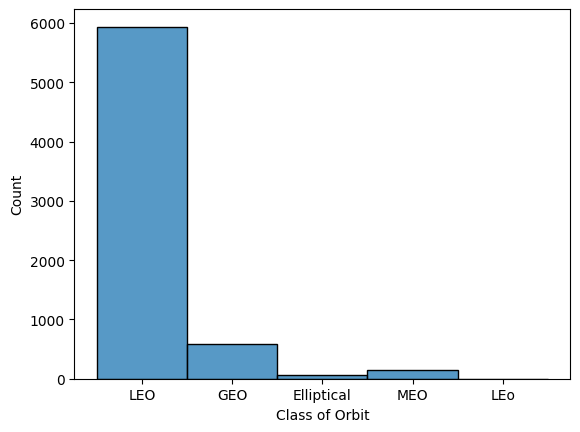

In [34]:
# 5.Explore the "Class of Orbit" column and determine the number of satellites in each orbit class.
sns.histplot(df["Class of Orbit"])

<Axes: ylabel='Launch Mass (kg.)'>

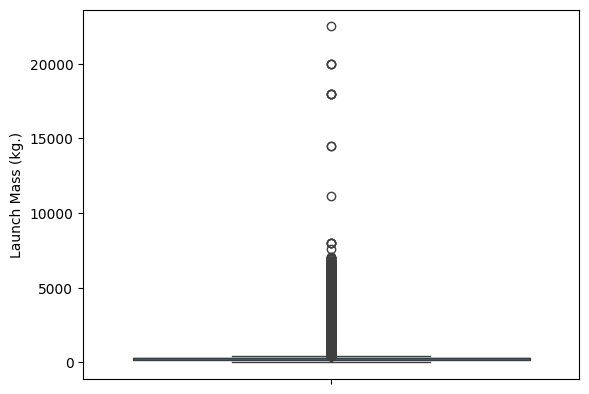

In [35]:
# 6.Analyze the distribution of "Launch Mass (kg)" and identify any outliers.
# df['Launch Mass (kg.)'] = df['Launch Mass (kg.)'].apply(lambda x: x.replace(',', '') if type(x) not in (int, float) else x)
sns.boxplot(df['Launch Mass (kg.)'])

# answer: usual mass is between 0 to 7,500, everything can be considered outliers

<Axes: xlabel='Power (watts)', ylabel='Expected Lifetime (yrs.)'>

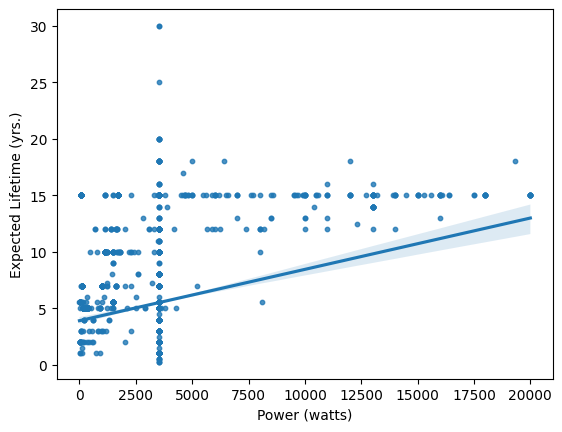

In [36]:
# 7.Is there a correlation between the "Power (watts)" and "Expected Lifetime (yrs.)" columns? Visualize this relationship.
# df['Power (watts)'] = pd.to_numeric(df['Power (watts)'].replace(',', '', regex=True), errors='coerce')
df['Expected Lifetime (yrs.)'] = pd.to_numeric(df['Expected Lifetime (yrs.)'].replace(',', '', regex=True),errors='coerce')
sns.regplot( data = df,
                x = 'Power (watts)',
                y = 'Expected Lifetime (yrs.)',
            scatter_kws={'s':10}
               )

# answer: from the graph, there is a directly proportional linear relation between power and expected lifetime in the dataset

Satellite with longest period in orbit is: 1168
Satellite with shortest period in orbit is: 1403


<Axes: xlabel='Class of Orbit', ylabel='Period (minutes)'>

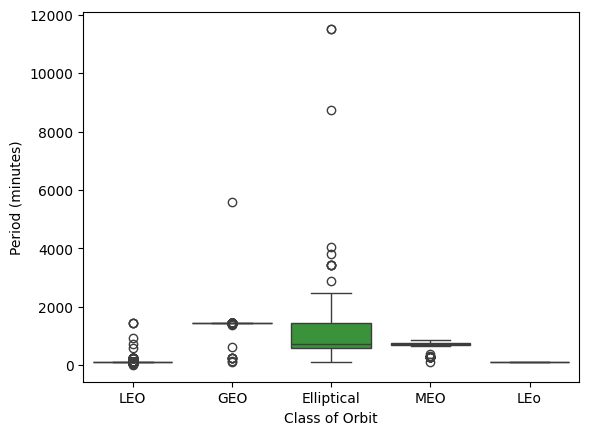

In [37]:
# 8.Identify the satellites with the longest and shortest periods in orbit. Visualize the satellite periods in orbit for each orbit.

df['Period (minutes)'] = pd.to_numeric(df['Period (minutes)'].replace(',', '', regex=True),errors='coerce')
df['Period (minutes)']
print(f"Satellite with longest period in orbit is: {df['Period (minutes)'].idxmax()}")
print(f"Satellite with shortest period in orbit is: {df['Period (minutes)'].idxmin()}")

sns.boxplot(data = df, x = 'Class of Orbit', y='Period (minutes)', hue='Class of Orbit')

In [38]:
# 9.Can you create a model to predict the "Expected Lifetime (yrs.)" based on other relevant features in the dataset?

# 9.a. encoding
from sklearn.preprocessing import LabelEncoder

encoders = {}
for feature in df.columns:
    if df[feature].dtype=='object':
        encoders[feature]=  LabelEncoder()
        df[feature] = encoders[feature].fit_transform( df[feature] )

<Axes: >

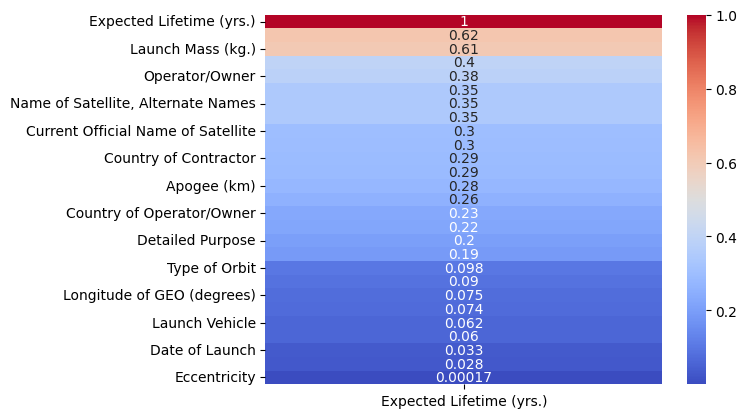

In [39]:
# 9.b. correlation

corr = df.corr()['Expected Lifetime (yrs.)']
corr = corr.abs().sort_values(ascending=False)
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm')

In [40]:
# 9.c. feature selection
threshold = .05
columns_below_threshold = corr[abs(corr) < threshold].index
print(f"Dropping columns : {columns_below_threshold}")

df_clean = df.drop(columns = columns_below_threshold, axis=1)

Dropping columns : Index(['Date of Launch', 'Purpose', 'Eccentricity'], dtype='object')


In [41]:
# 9.d splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('Expected Lifetime (yrs.)', axis=1),
                                                    df_clean['Expected Lifetime (yrs.)'],
                                                    test_size= .2)

In [42]:
# 9.d. train and test
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor() )
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict( X_test)
root_score = r2_score(y_test, y_pred)
print(f"Root score with Random Forest regressor is {root_score}")

Root score with Random Forest regressor is 0.8759807139529603


# 3. forcast the class of orbit for new satellites

In [43]:
pd.set_option('display.max_columns',None)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',None)

file_path1 = '/content/UCS-Satellite-Database-Officialname-1-1-2023.csv'
file_path2 = '/content/UCS-Satellite-Database-1-1-2023.csv'

data1 = pd.read_csv(file_path1,encoding='latin-1')
data2 = pd.read_csv(file_path2,encoding='latin-1')

data1.reset_index(drop=True, inplace=True)

column_names = data1.columns.tolist()
column_names
data1.shape
data2.shape
column_names = data1.columns.tolist()
print("Column Names:", column_names,"\n")

print("Shape of data1:", data1.shape)
print("Shape of data2:", data2.shape)

Column Names: ['Current Official Name of Satellite', 'Country/Org of UN Registry', 'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose', 'Detailed Purpose', 'Class of Orbit', 'Type of Orbit', 'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)', 'Eccentricity', 'Inclination (degrees)', 'Period (minutes)', 'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)', 'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor', 'Country of Contractor', 'Launch Site', 'Launch Vehicle', 'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 27', 'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2', 'Source.3', 'Source.4', 'Source.5', 'Source.6', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed

In [44]:
differences = data2.merge(data1, how='left', indicator=True).loc[lambda x: x['_merge'] == 'right_only']

# Count the number of rows that are different
num_differences = len(differences)

# Check if there are differences and print the count
if num_differences > 0:
    print(f"There are {num_differences} rows that are different between data1 and data2.")
    print("The different rows are:")
    print(differences)
else:
    print("There are no differences between data1 and data2.")

There are no differences between data1 and data2.


In [45]:
'''goal of this project
Predictive Modeling:
forcast the class of orbit for new satellites

maybe collision prediction?'''

'goal of this project\nPredictive Modeling:\nforcast the class of orbit for new satellites\n\nmaybe collision prediction?'

In [46]:
descriptive_stats = data1.iloc[:, :25].describe(include='all')
descriptive_stats

Current Official Name of Satellite Country/Org of UN Registry Country of Operator/Owner Operator/Owner       Users         Purpose Detailed Purpose Class of Orbit       Type of Orbit  Longitude of GEO (degrees) Perigee (km) Apogee (km)  Eccentricity Inclination (degrees) Period (minutes) Launch Mass (kg.)  Dry Mass (kg.)  Power (watts) Date of Launch  Expected Lifetime (yrs.) Contractor Country of Contractor     Launch Site Launch Vehicle COSPAR Number
count                                6718                       6718                      6718           6718        6718            6718             1167           6718                6077                 6716.000000         6718        6718   6718.000000                  6718             6674              6475              444           581           6718               4804.000000       6718                  6718            6718           6718          6718
unique                               6698                         70                       104            639          20              31               52              5                   8                         NaN          783         777           NaN                   450              579               566              171           152           1187                       NaN        560                   103              39            164          6707
top                               Jilin-1                        USA                       USA         SpaceX  Commercial  Communications  Optical Imaging            LEO  Non-Polar Inclined                         NaN          548         541           NaN                    53             95.6               260             678          50.00     13-01-2022                       NaN     SpaceX                   USA  Cape Canaveral       Falcon 9     2022-132A
freq                                    5                       4165                      4511           3349        5272            4812              470           5936                3740                         NaN          922         978           NaN                  1885             1262              2962               76            79             93                       NaN       3395                  4918            3615           3930             2
mean                                  NaN                        NaN                       NaN            NaN         NaN             NaN              NaN            NaN                 NaN                    1.844772          NaN         NaN      0.391619                   NaN              NaN               NaN              NaN           NaN            NaN                  5.510148        NaN                   NaN             NaN            NaN           NaN
std                                   NaN                        NaN                       NaN            NaN         NaN             NaN              NaN            NaN                 NaN                   27.608673          NaN         NaN     14.122881                   NaN              NaN               NaN              NaN           NaN            NaN                  3.592762        NaN                   NaN             NaN            NaN           NaN
min                                   NaN                        NaN                       NaN            NaN         NaN             NaN              NaN            NaN                 NaN                 -179.800000          NaN         NaN     -0.033400                   NaN              NaN               NaN              NaN           NaN            NaN                  0.250000        NaN                   NaN             NaN            NaN           NaN
25%                                   NaN                        NaN                       NaN            NaN         NaN             NaN              NaN            NaN                 NaN                    0.000000          NaN         NaN      0.000202                   NaN              NaN

In [47]:
# Dropping columns 26 and beyond
data1_trimmed = data1.iloc[:, :25]

# Confirming the columns have been dropped by displaying the remaining column names
remaining_columns = data1_trimmed.columns.tolist()
remaining_columns

['Current Official Name of Satellite',
 'Country/Org of UN Registry',
 'Country of Operator/Owner',
 'Operator/Owner',
 'Users',
 'Purpose',
 'Detailed Purpose',
 'Class of Orbit',
 'Type of Orbit',
 'Longitude of GEO (degrees)',
 'Perigee (km)',
 'Apogee (km)',
 'Eccentricity',
 'Inclination (degrees)',
 'Period (minutes)',
 'Launch Mass (kg.)',
 ' Dry Mass (kg.) ',
 'Power (watts)',
 'Date of Launch',
 'Expected Lifetime (yrs.)',
 'Contractor',
 'Country of Contractor',
 'Launch Site',
 'Launch Vehicle',
 'COSPAR Number']

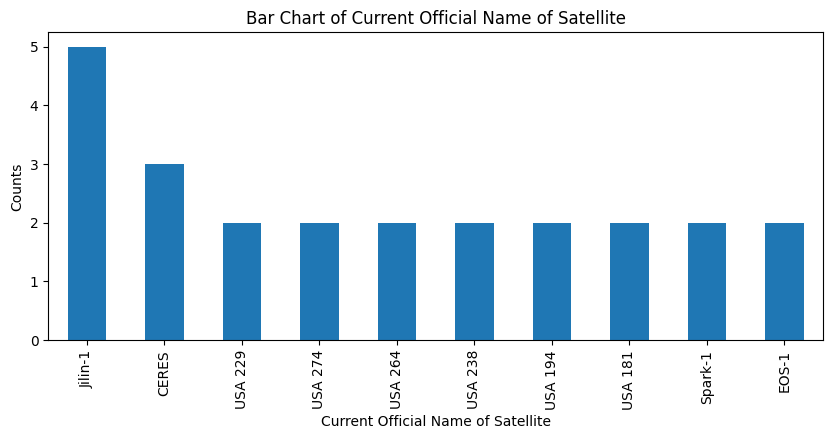

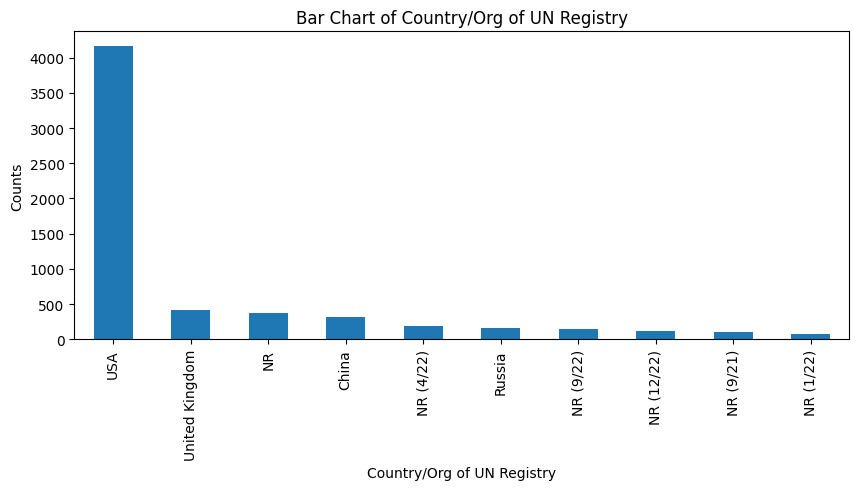

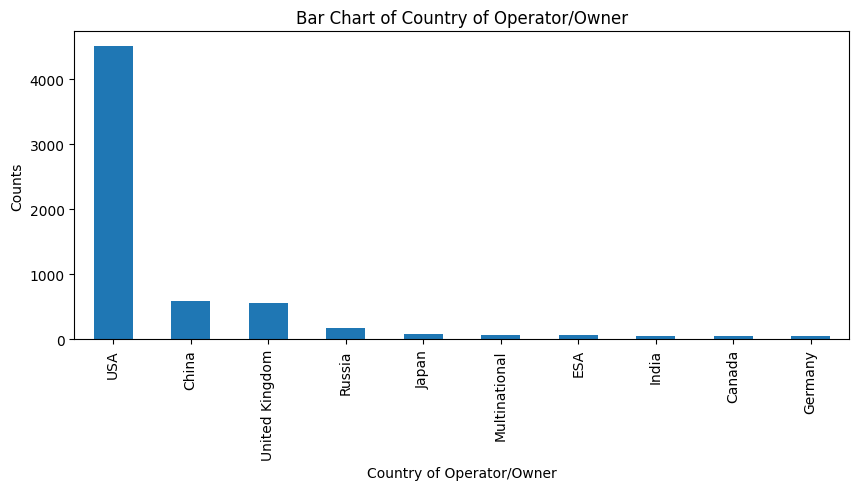

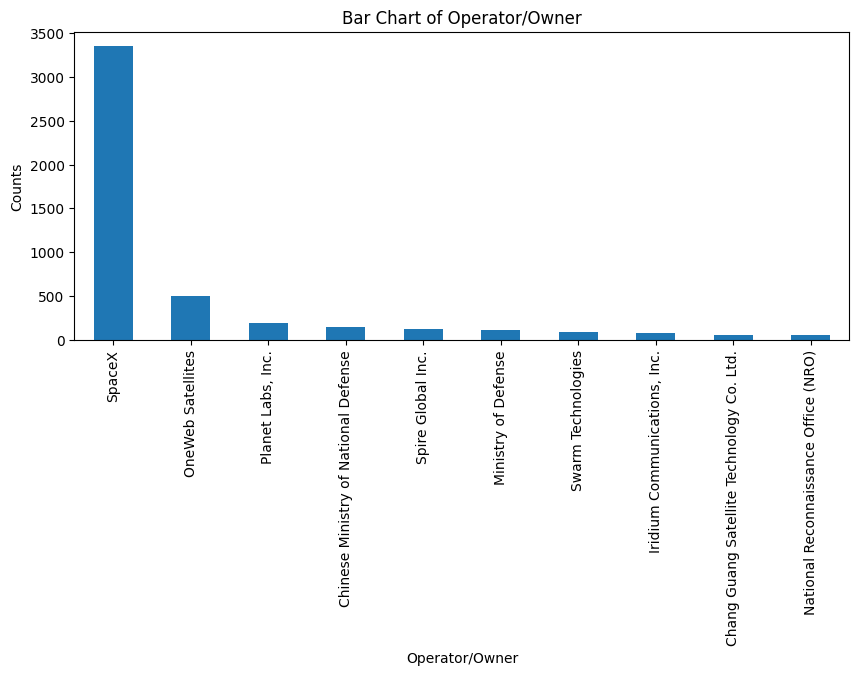

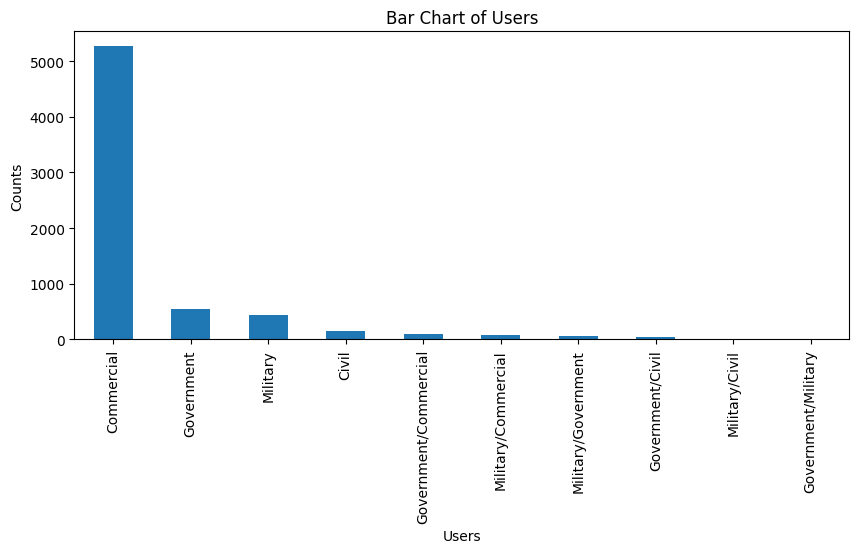

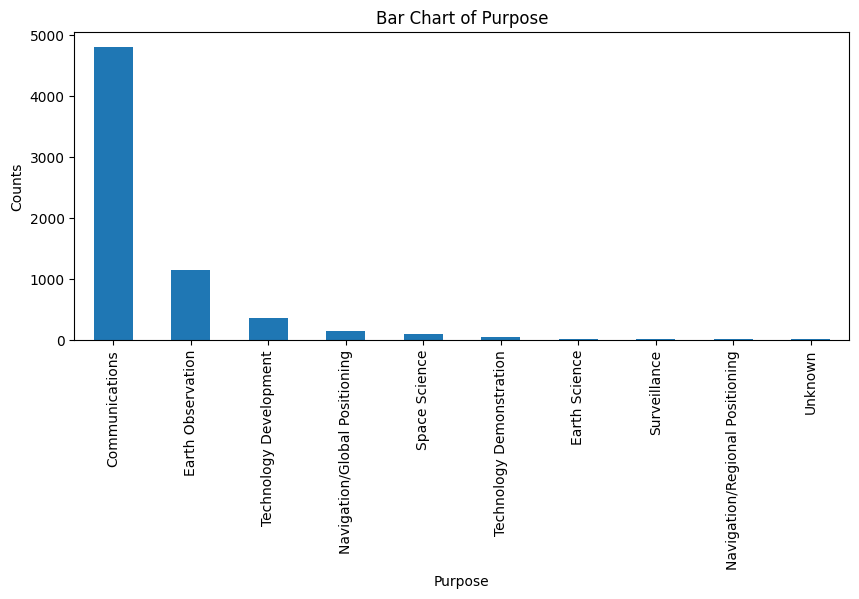

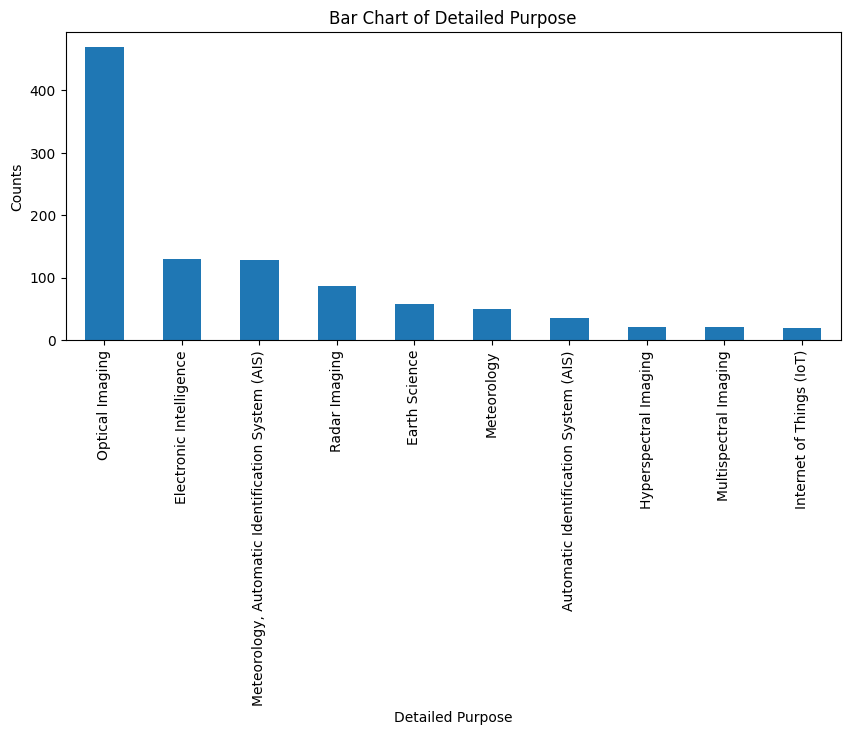

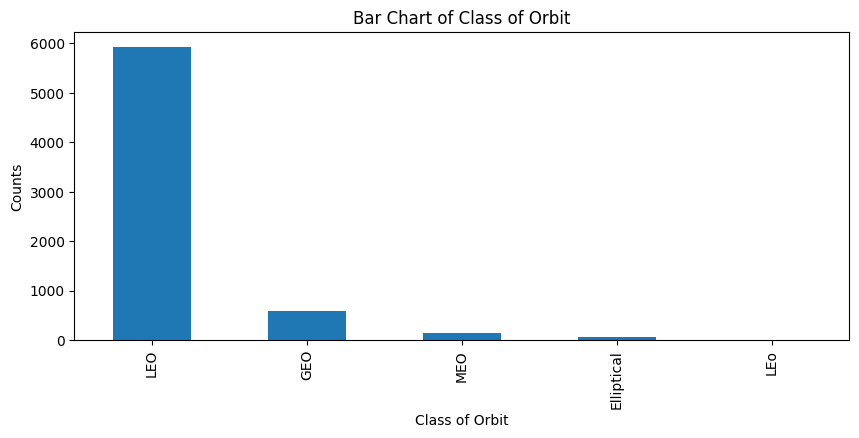

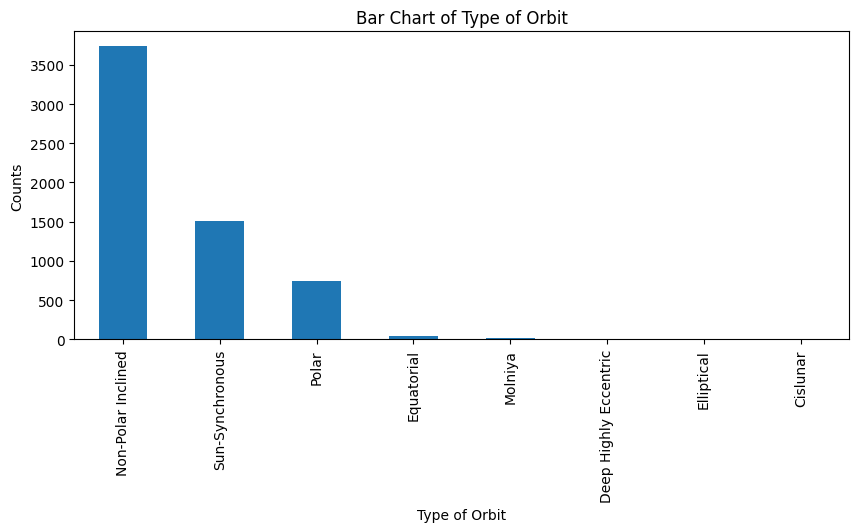

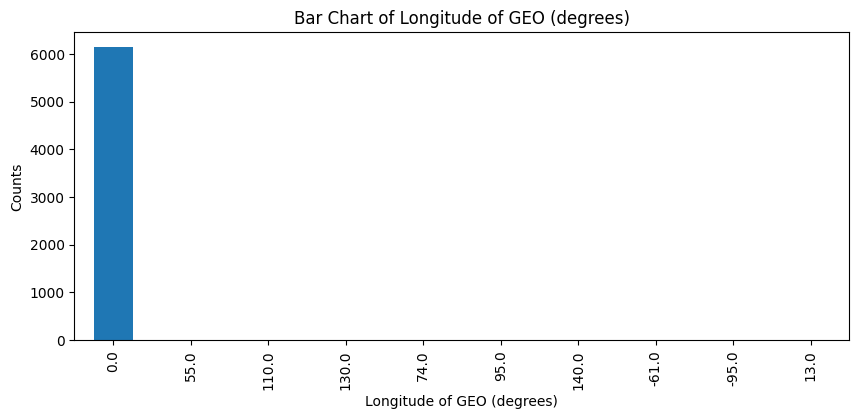

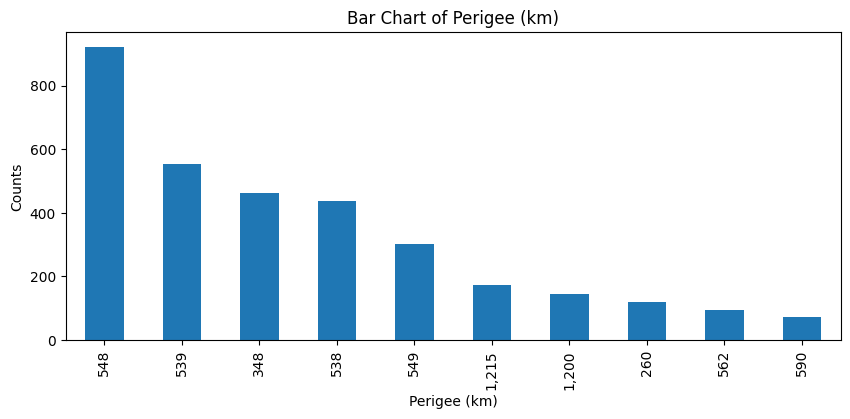

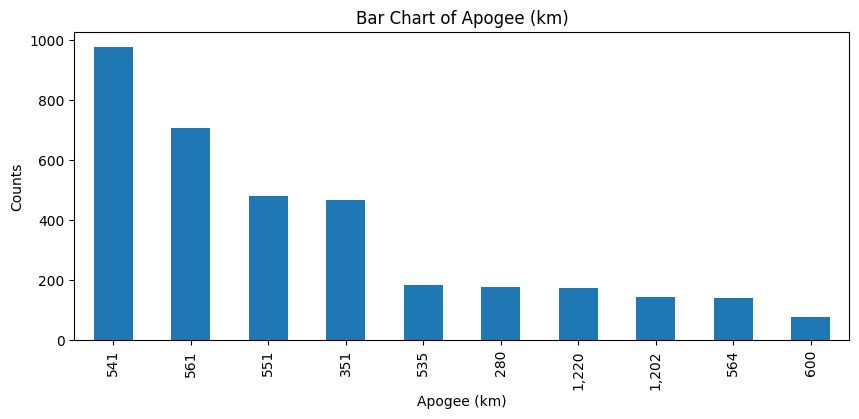

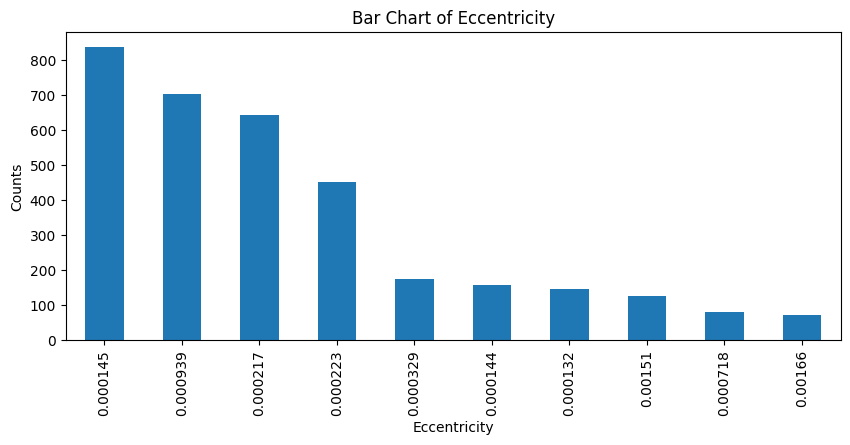

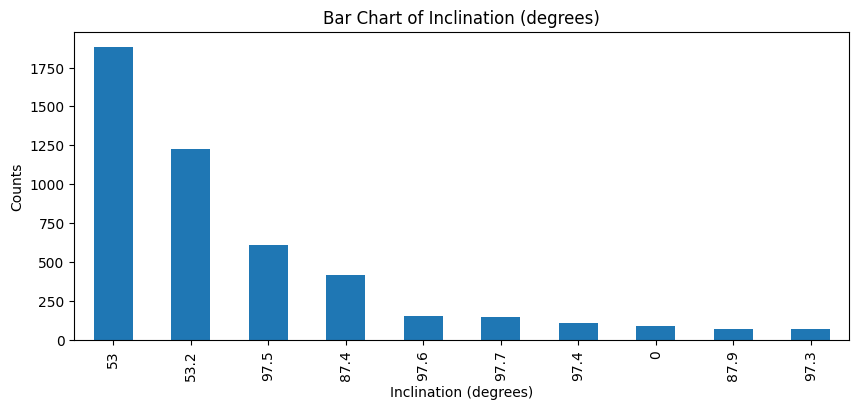

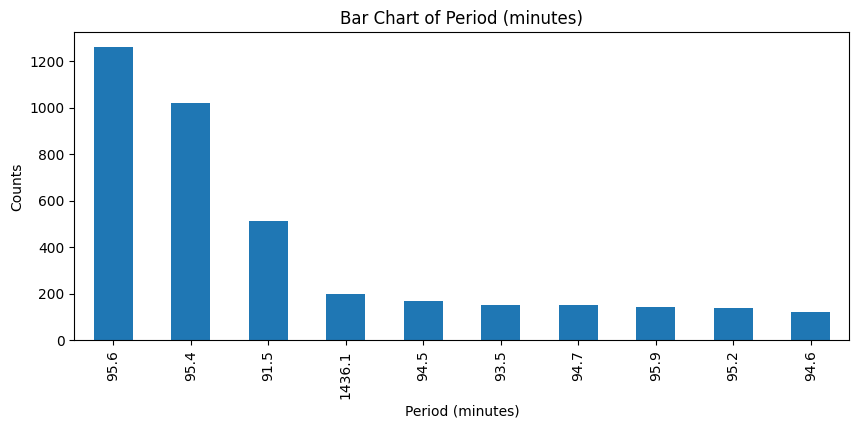

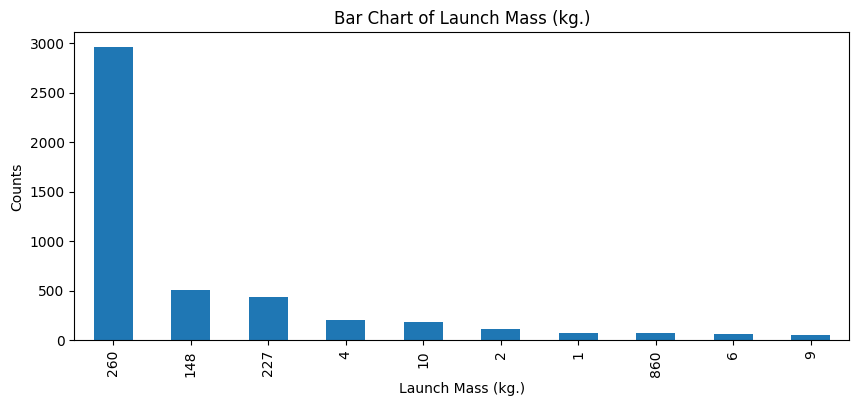

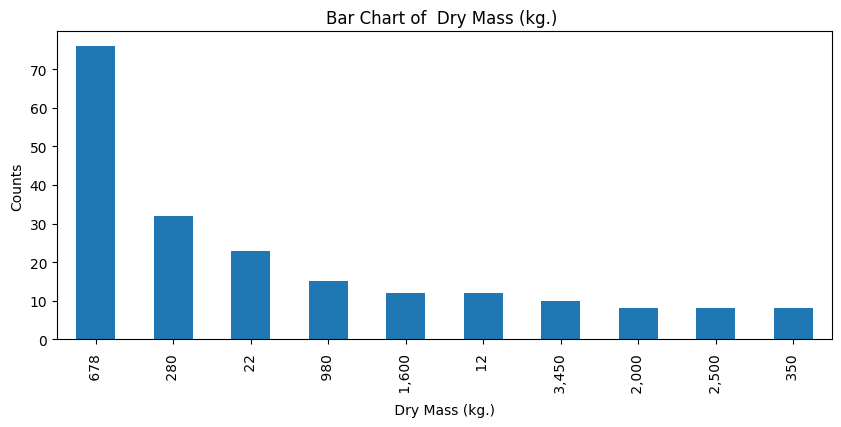

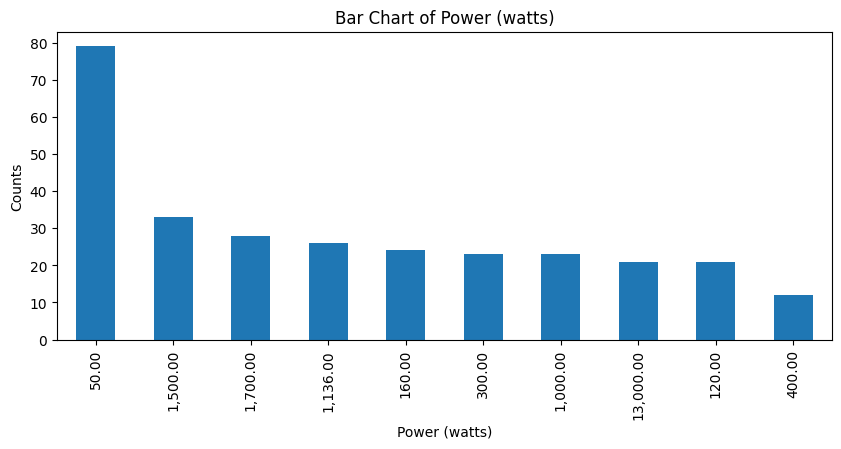

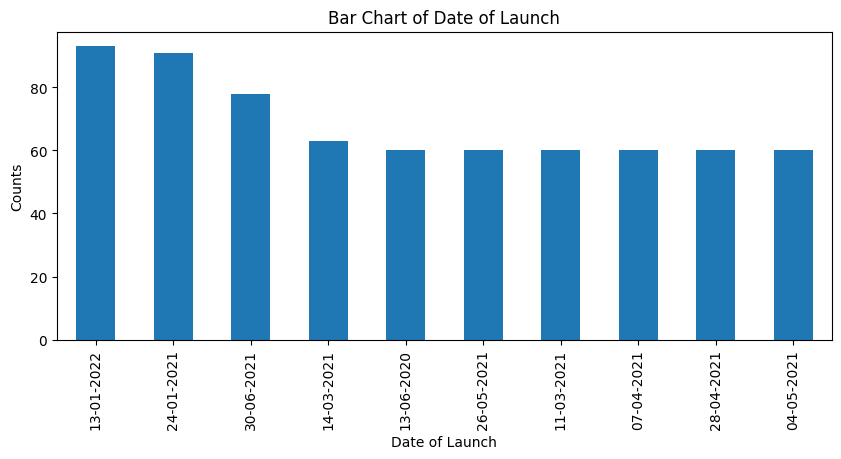

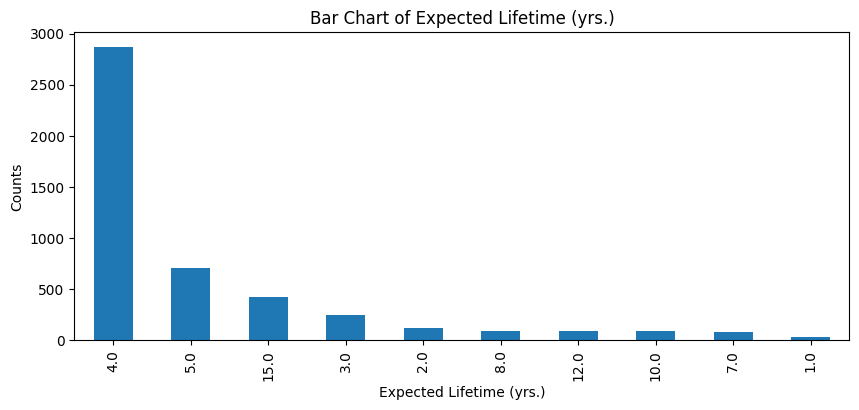

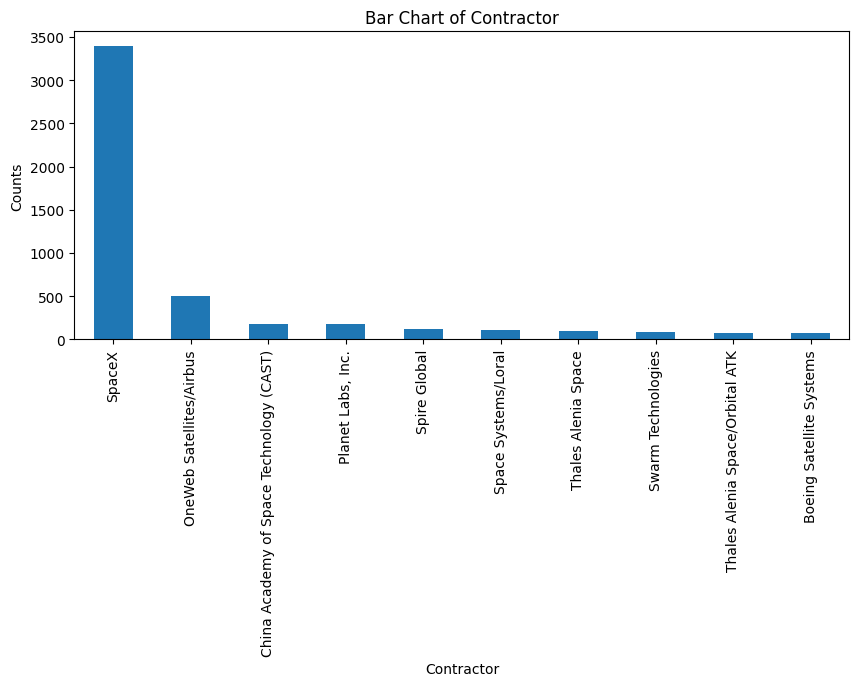

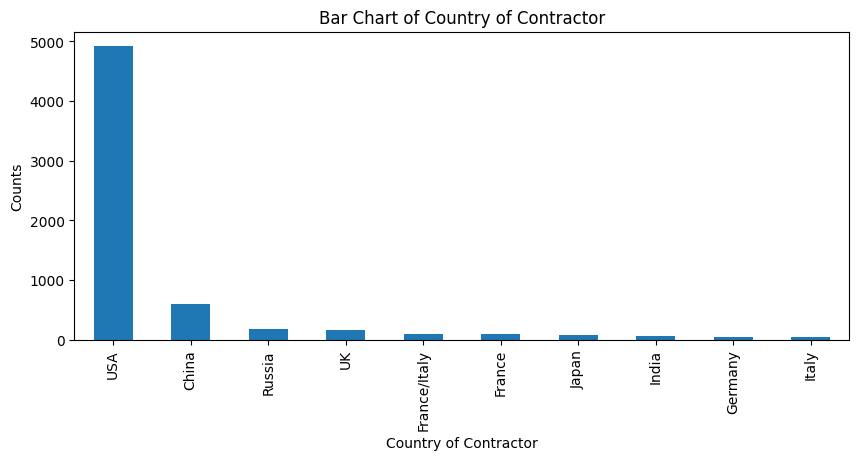

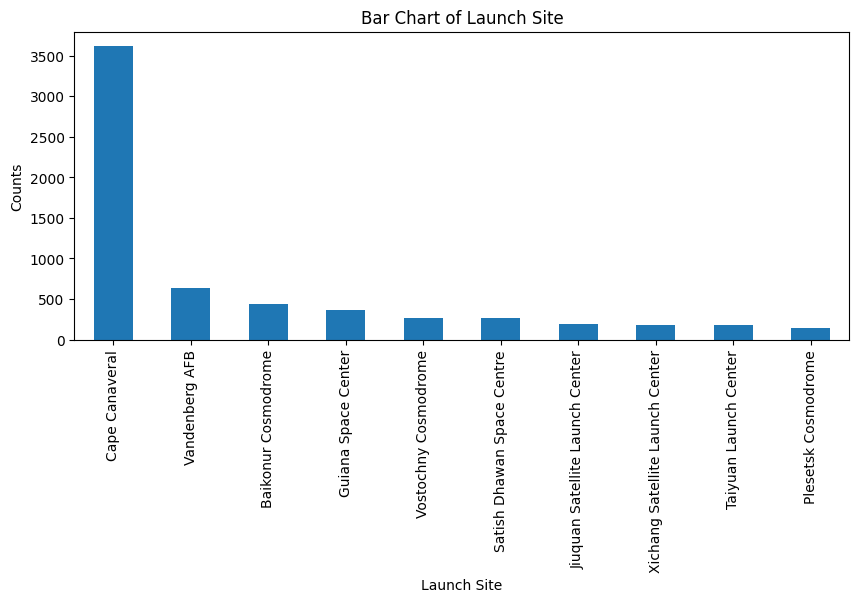

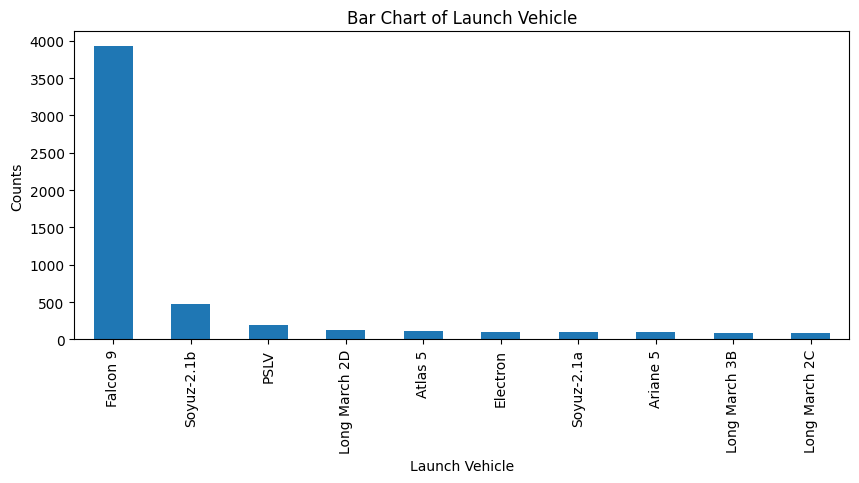

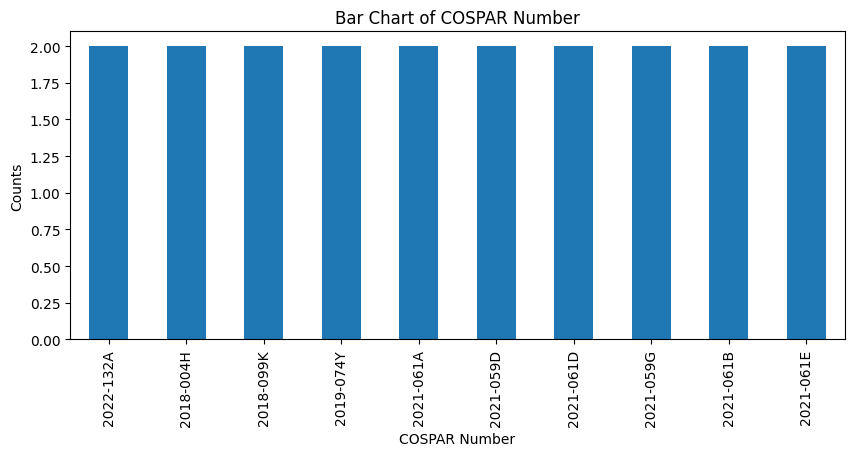

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to determine if a column is numeric
def is_numeric(df, col):
    valid_data_types = {'int64', 'bool', 'uint64', 'float64', 'complex128'}
    return df[col].dtype in valid_data_types

# Function to plot data
def plot_data(df, col):
    if is_numeric(df, col):
        # Plotting histogram for numeric columns
        sns.histplot(df[col].dropna(), kde=False, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        # Plotting bar chart for categorical columns
        value_counts = df[col].value_counts().nlargest(10) # top 10 values for visibility
        value_counts.plot(kind='bar')
        plt.title(f'Bar Chart of {col}')
        plt.xlabel(col)
        plt.ylabel('Counts')

    plt.show()

# Exploratory Data Analysis (EDA) with visualizations for each column
for column in data1_trimmed.columns:
    plt.figure(figsize=(10, 4))
    plot_data(data1_trimmed, column)

In [49]:
#drop duplicates
data1_trimmed.drop_duplicates(inplace=True)

data1_trimmed.shape

(6718, 25)

In [50]:
# Define a function to standardize column names (e.g., lowercase and replace spaces with underscores)
def standardize_column_name(col_name):
    return col_name.lower().replace(' ', '_')

# Apply the function to all column names
data1_trimmed.columns = [standardize_column_name(col) for col in data1_trimmed.columns]

# Now, all column names are standardized
std_columns = data1_trimmed.columns.tolist()
std_columns

['current_official_name_of_satellite',
 'country/org_of_un_registry',
 'country_of_operator/owner',
 'operator/owner',
 'users',
 'purpose',
 'detailed_purpose',
 'class_of_orbit',
 'type_of_orbit',
 'longitude_of_geo_(degrees)',
 'perigee_(km)',
 'apogee_(km)',
 'eccentricity',
 'inclination_(degrees)',
 'period_(minutes)',
 'launch_mass_(kg.)',
 '_dry_mass_(kg.)_',
 'power_(watts)',
 'date_of_launch',
 'expected_lifetime_(yrs.)',
 'contractor',
 'country_of_contractor',
 'launch_site',
 'launch_vehicle',
 'cospar_number']

In [51]:
'''
removing less relevant columns:
'current_official_name_of_satellite','purpose',
 'detailed_purpose','cospar_number','country/org_of_un_registry'
'''

"\nremoving less relevant columns:\n'current_official_name_of_satellite','purpose',\n 'detailed_purpose','cospar_number','country/org_of_un_registry'\n"

In [52]:
# Defining less relevant columns for removal based on the analysis tasks
less_relevant_columns = ['current_official_name_of_satellite','purpose',
                             'detailed_purpose','cospar_number','country/org_of_un_registry']

# Removing the less relevant columns from the dataset
data1_new = data1_trimmed.drop(columns=less_relevant_columns)

# Displaying the remaining columns for confirmation
data1_new.columns.tolist()

['country_of_operator/owner',
 'operator/owner',
 'users',
 'class_of_orbit',
 'type_of_orbit',
 'longitude_of_geo_(degrees)',
 'perigee_(km)',
 'apogee_(km)',
 'eccentricity',
 'inclination_(degrees)',
 'period_(minutes)',
 'launch_mass_(kg.)',
 '_dry_mass_(kg.)_',
 'power_(watts)',
 'date_of_launch',
 'expected_lifetime_(yrs.)',
 'contractor',
 'country_of_contractor',
 'launch_site',
 'launch_vehicle']

In [53]:
# Assuming 'modified_df' is your modified DataFrame
data1_new.to_csv('modified_dataset.csv', index=False)

from IPython.display import FileLink

FileLink('modified_dataset.csv')

/content/modified_dataset.csv

In [54]:
# Checking for missing values and data types
missing_values = data1_new.isnull().sum()
data_types = data1_new.dtypes

# Combining the information for a comprehensive view
missing_values_data_types = pd.DataFrame ({'Missing Values': missing_values, 'Data Types': data_types})
missing_values_data_types

Missing Values Data Types
country_of_operator/owner                0     object
operator/owner                           0     object
users                                    0     object
class_of_orbit                           0     object
type_of_orbit                          641     object
longitude_of_geo_(degrees)               2    float64
perigee_(km)                             0     object
apogee_(km)                              0     object
eccentricity                             0    float64
inclination_(degrees)                    0     object
period_(minutes)                        44     object
launch_mass_(kg.)                      243     object
_dry_mass_(kg.)_                      6274     object
power_(watts)                         6137     object
date_of_launch                           0     object
expected_lifetime_(yrs.)              1914    float64
contractor                               0     object
country_of_contractor                    0     object
launch_site                              0     object
launch_vehicle                           0     object

In [55]:
# _dry_mass_ and power_(watts) have too many missing values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Selecting relevant features for the model
# Assuming that features like 'country_of_operator/owner', 'users', 'type_of_orbit',
# 'longitude_of_geo_(degrees)', 'perigee_(km)', 'apogee_(km)', 'eccentricity',
# 'inclination_(degrees)', 'launch_mass_(kg.)', 'power_(watts)', 'date_of_launch',
# 'expected_lifetime_(yrs.)' could be relevant for predicting the class of orbit


features = ['country_of_operator/owner', 'users', 'type_of_orbit',
            'longitude_of_geo_(degrees)', 'perigee_(km)', 'apogee_(km)',
            'eccentricity', 'inclination_(degrees)', 'launch_mass_(kg.)',
            'date_of_launch', 'expected_lifetime_(yrs.)']

# Target variable
target = 'class_of_orbit'

# Handling missing values - Filling numerical columns with the median and categorical with the mode
for feature in features:
    if data1_new[feature].dtype == 'object':
        data1_new[feature].fillna(data1_new[feature].mode()[0], inplace=True)
    else:
        data1_new[feature].fillna(data1_new[feature].median(), inplace=True)

# Encoding categorical variables
label_encoders = {}
for feature in features:
    if data1_new[feature].dtype == 'object':
        le = LabelEncoder()
        data1_new[feature] = le.fit_transform(data1_new[feature])
        label_encoders[feature] = le

# Splitting the data1_new into training and testing sets
X = data1_new[features]
y = data1_new[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5374, 11), (1344, 11), (5374,), (1344,))

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, classification_rep_rf


(0.9970238095238095,
 '              precision    recall  f1-score   support\n\n  Elliptical       0.91      0.91      0.91        11\n         GEO       0.98      0.99      0.99       117\n         LEO       1.00      1.00      1.00      1189\n         MEO       1.00      1.00      1.00        27\n\n    accuracy                           1.00      1344\n   macro avg       0.97      0.97      0.97      1344\nweighted avg       1.00      1.00      1.00      1344\n')

In [57]:
'''
#built a interactive widgets so user can test it out


import ipywidgets as widgets
from IPython.display import display, clear_output

# Create widgets for each feature
# For simplicity, using text input for all features.
# In a real-world application, you'd want to match the widget type to the feature type (e.g., dropdown for categorical)

widget_country_of_operator = widgets.Dropdown(options=list(label_encoders['country_of_operator/owner'].classes_), description='Country of Operator:')
widget_users = widgets.Dropdown(options=list(label_encoders['users'].classes_), description='Users:')
widget_type_of_orbit = widgets.Dropdown(options=list(label_encoders['type_of_orbit'].classes_), description='Type of Orbit:')
widget_longitude = widgets.FloatText(value=0.0, description='Longitude (Degrees):')
widget_perigee = widgets.IntText(value=0, description='Perigee (km):')
widget_apogee = widgets.IntText(value=0, description='Apogee (km):')
widget_eccentricity = widgets.FloatText(value=0.0, description='Eccentricity:')
widget_inclination = widgets.FloatText(value=0.0, description='Inclination (Degrees):')
widget_launch_mass = widgets.IntText(value=0, description='Launch Mass (kg):')
widget_date_of_launch = widgets.DatePicker(description='Date of Launch:')
widget_lifetime = widgets.FloatText(value=0.0, description='Expected Lifetime (Years):')

# Button to make predictions
predict_button = widgets.Button(description="Predict Orbit Class")

# Output widget to display results
output = widgets.Output()

# Function to make predictions
def on_predict_button_clicked(b):
    # Preprocess inputs
    input_data = {
        'country_of_operator/owner': widget_country_of_operator.value,
        'users': widget_users.value,
        'type_of_orbit': widget_type_of_orbit.value,
        'longitude_of_geo_(degrees)': widget_longitude.value,
        'perigee_(km)': widget_perigee.value,
        'apogee_(km)': widget_apogee.value,
        'eccentricity': widget_eccentricity.value,
        'inclination_(degrees)': widget_inclination.value,
        'launch_mass_(kg.)': widget_launch_mass.value,
        'date_of_launch': widget_date_of_launch.value,
        'expected_lifetime_(yrs.)': widget_lifetime.value
    }

    # Encoding categorical variables
    for key, encoder in revised_label_encoders.items():
        if key in input_data:
            input_data[key] = encoder.transform([input_data[key]])[0]

    # Convert date to ordinal
    input_data['date_of_launch'] = pd.to_datetime(input_data['date_of_launch']).toordinal()

    # Make prediction
    prediction = rf_model.predict([list(input_data.values())])[0]
    prediction_text = label_encoders['class_of_orbit'].inverse_transform([prediction])[0]

    with output:
        clear_output()
        print(f"Predicted Class of Orbit: {prediction_text}")

# Link button to function
predict_button.on_click(on_predict_button_clicked)

# Display widgets
input_widgets = widgets.VBox([widget_country_of_operator, widget_users, widget_type_of_orbit, widget_longitude,
                              widget_perigee, widget_apogee, widget_eccentricity, widget_inclination,
                              widget_launch_mass, widget_date_of_launch, widget_lifetime, predict_button])
display(input_widgets, output)
'''

'\n#built a interactive widgets so user can test it out\n\n\nimport ipywidgets as widgets\nfrom IPython.display import display, clear_output\n\n# Create widgets for each feature\n# For simplicity, using text input for all features.\n# In a real-world application, you\'d want to match the widget type to the feature type (e.g., dropdown for categorical)\n\nwidget_country_of_operator = widgets.Dropdown(options=list(label_encoders[\'country_of_operator/owner\'].classes_), description=\'Country of Operator:\')\nwidget_users = widgets.Dropdown(options=list(label_encoders[\'users\'].classes_), description=\'Users:\')\nwidget_type_of_orbit = widgets.Dropdown(options=list(label_encoders[\'type_of_orbit\'].classes_), description=\'Type of Orbit:\')\nwidget_longitude = widgets.FloatText(value=0.0, description=\'Longitude (Degrees):\')\nwidget_perigee = widgets.IntText(value=0, description=\'Perigee (km):\')\nwidget_apogee = widgets.IntText(value=0, description=\'Apogee (km):\')\nwidget_eccentrici

# 4. Satellites EDA with Inference

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcParams["figure.dpi"] = 144
import seaborn as sns
from matplotlib import ticker
from wordcloud import WordCloud
from datetime import datetime
from matplotlib.patches import Patch
from scipy import stats

In [59]:
# Check out the columns
df = pd.read_csv('/content/UCS-Satellite-Database-1-1-2023.csv',encoding='windows-1252')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Detailed Purpose                    1167 non-null   object 
 8   Class of Orbit                      6718 non-null   object 
 9   Type of Orbit                       6077 non-null   object 
 10  Longitude of GEO (degrees)          6716 non-null   float64
 11  Perigee (km)                        6718 no

In [60]:
# Show how many elements of each column are NaN
df.isna().sum().head(50)

Name of Satellite, Alternate Names       0
Current Official Name of Satellite       0
Country/Org of UN Registry               0
Country of Operator/Owner                0
Operator/Owner                           0
Users                                    0
Purpose                                  0
Detailed Purpose                      5551
Class of Orbit                           0
Type of Orbit                          641
Longitude of GEO (degrees)               2
Perigee (km)                             0
Apogee (km)                              0
Eccentricity                             0
Inclination (degrees)                    0
Period (minutes)                        44
Launch Mass (kg.)                      243
 Dry Mass (kg.)                       6274
Power (watts)                         6137
Date of Launch                           0
Expected Lifetime (yrs.)              1914
Contractor                               0
Country of Contractor                    0
Launch Site

In [61]:
# Investigate the unnamed columns unique values - what are these columns for?
eval("[df[f'Unnamed: {i}'].value_counts() for i in range(37,68)]")

[Unnamed: 37
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 38
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 39
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 40
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 41
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 42
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 43
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 44
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 45
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 46
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 47
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 48
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 49
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 50
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 51
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 52
 Estimated    484
 Name: count, dtype: int64,
 Unnamed: 53
 Estimated    484
 Name: count, dtype: int6

In [62]:
df['Comments'].value_counts().head(20)

Comments
Lemur surveillance of satellites or LEO.                                                              86
Sensing surveillance of satellites in LEO.                                                            39
Next generation expected to last to 2030                                                              30
C surveillance of satellites in LEO.                                                                  18
Remote surveillance of satellites in LEO.                                                             14
ICEYE surveillance of satellites r  LEO.                                                              14
High Resolution Optical Imaging                                                                       13
Thought to be for intelligence gathering.                                                             11
Part of Beidou constellation.                                                                         10
Unknown mission.                              

In [63]:
df['Source'].value_counts()

Source
https://spaceflightnow.com/2021/01/24/spacex-launches-record-setting-rideshare-mission-with-143-small-satellites/                                                                                              74
https://spaceflightnow.com/2021/03/14/spacex-extends-its-own-rocket-reuse-record-on-starlink-launch/                                                                                                           60
https://spaceflightnow.com/2021/04/29/spacex-launches-60-more-starlink-spacecraft-fcc-clears-spacex-to-fly-satellites-at-lower-altitudes/                                                                      60
https://spaceflightnow.com/2021/04/07/spacex-launches-its-100th-mission-from-floridas-space-coast/                                                                                                             60
https://spaceflightnow.com/2021/03/11/spacex-adds-more-satellites-to-starlink-internet-fleet/                                                            

In [64]:
# Drop unneeded columns with high nan counts
df = df.drop(labels=[f'Unnamed: {i}' for i in range(37,68)], axis=1)
df = df.drop(labels=['Unnamed: 28'], axis=1)
df = df.drop(labels=['Source','Source.1','Source.2','Source.3','Source.4','Source.5','Source.6'], axis=1)
df = df.drop(labels=[' Dry Mass (kg.) ','Power (watts)'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Detailed Purpose                    1167 non-null   object 
 8   Class of Orbit                      6718 non-null   object 
 9   Type of Orbit                       6077 non-null   object 
 10  Longitude of GEO (degrees)          6716 non-null   float64
 11  Perigee (km)                        6718 no

In [65]:
# Investigate the unique values in several columns
df['Purpose'].value_counts()

Purpose
Communications                                    4812
Earth Observation                                 1142
Technology Development                             366
Navigation/Global Positioning                      141
Space Science                                       98
Technology Demonstration                            42
Earth Science                                       22
Surveillance                                        14
Navigation/Regional Positioning                     13
Unknown                                             10
Earth Observation/Navigation                         9
Space Observation                                    9
Earth Observation/Technology Development             7
Communications/Maritime Tracking                     5
Communications/Technology Development                5
Earth Observation                                    4
Earth Observation/Communications                     2
Earth/Space Observation                              2
Mi

In [66]:
df['Detailed Purpose'].value_counts()

Detailed Purpose
Optical Imaging                                          470
Electronic Intelligence                                  129
Meteorology, Automatic Identification System (AIS)       128
Radar Imaging                                             86
Earth Science                                             58
Meteorology                                               50
Automatic Identification System (AIS)                     36
Hyperspectral Imaging                                     21
Multispectral Imaging                                     20
Internet of Things (IoT)                                  19
Earth Science/Meterology                                  18
Radar Imaging (SAR)                                       15
Amateur Radio                                             14
Infrared Imaging                                          12
Radar Imaging/Earth Science                                8
Video Imaging                                              7
Data Re

In [67]:
df['Expected Lifetime (yrs.)'].value_counts()

Expected Lifetime (yrs.)
4.00     2872
5.00      704
15.00     423
3.00      246
2.00      122
8.00       84
12.00      83
10.00      83
7.00       77
1.00       26
14.00      15
18.00      13
13.00      12
11.00       6
16.00       6
20.00       5
9.00        5
0.50        4
6.00        4
0.25        3
1.50        2
30.00       2
7.25        2
17.00       1
25.00       1
2.50        1
12.50       1
4.50        1
Name: count, dtype: int64

In [68]:
df['Date of Launch'].value_counts()

Date of Launch
13-01-2022    93
24-01-2021    91
30-06-2021    78
14-03-2021    63
13-06-2020    60
26-05-2021    60
11-03-2021    60
07-04-2021    60
28-04-2021    60
04-05-2021    60
29-04-2022    59
09-05-2021    59
18-08-2020    58
15-02-2021    58
20-01-2021    58
04-02-2021    57
18-03-2020    57
07-08-2020    57
04-03-2021    56
03-06-2020    56
22-04-2020    55
17-12-2022    54
29-01-2020    54
04-10-2022    54
11-11-2019    54
28-12-2022    54
24-09-2022    54
07-07-2022    53
28-10-2022    53
07-01-2020    53
19-09-2022    53
21-04-2022    53
14-05-2022    53
13-05-2022    53
18-05-2022    53
17-06-2022    53
06-05-2022    53
20-10-2022    53
28-08-2022    53
24-07-2022    53
19-08-2022    53
17-07-2022    53
03-09-2020    52
13-11-2021    52
10-08-2022    52
17-02-2020    51
06-10-2020    51
13-09-2021    51
18-12-2021    50
15-05-2021    50
25-02-2022    50
19-01-2022    49
06-01-2022    49
02-12-2021    48
24-10-2020    48
09-03-2022    48
18-10-2020    48
24-03-2021    48

In [69]:
df['Operator/Owner'].value_counts().head(50)

Operator/Owner
SpaceX                                                                                3349
OneWeb Satellites                                                                      502
Planet Labs, Inc.                                                                      195
Chinese Ministry of National Defense                                                   147
Spire Global Inc.                                                                      127
Ministry of Defense                                                                    113
Swarm Technologies                                                                      84
Iridium Communications, Inc.                                                            75
Chang Guang Satellite Technology Co. Ltd.                                               53
National Reconnaissance Office (NRO)                                                    50
China Academy of Space Technology (CAST)                                   

In [70]:
len(df['Operator/Owner'].unique())

639

In [71]:
df['Users'].value_counts()

Users
Commercial                        5272
Government                         541
Military                           443
Civil                              154
Government/Commercial               97
Military/Commercial                 81
Military/Government                 56
Government/Civil                    44
Military/Civil                       7
Government/Military                  4
Commercial/Civil                     4
Civil/Government                     4
Civil/Military                       3
Commercial/Military                  2
Commercial                           1
Government                           1
Civil/Commercial                     1
Government/Commercial/Military       1
Commercial/Government                1
Military                             1
Name: count, dtype: int64

In [72]:
df['Launch Mass (kg.)'].value_counts().head(50)

Launch Mass (kg.)
260      2962
148       503
227       434
4         206
10        186
2         113
1          77
860        75
6          64
9          53
100        52
5          47
45         45
3          41
700        39
280        39
800        35
300        30
500        27
5,000      25
1,000      23
8          23
80         23
12         22
43         22
15         22
1,415      21
2,500      20
55         20
110        17
20         17
2,300      16
50         16
40         16
4,200      15
4,500      15
95         14
650        13
1,600      13
3,200      13
2,217      13
3,000      12
172        12
1,630      12
723        12
225        11
70         11
42         11
5,200      11
4,000      11
Name: count, dtype: int64

In [73]:
len(df['Launch Mass (kg.)'].unique())

567

In [74]:
df['Type of Orbit'].value_counts()

Type of Orbit
Non-Polar Inclined       3740
Sun-Synchronous          1510
Polar                     748
Equatorial                 38
Molniya                    23
Deep Highly Eccentric       9
Elliptical                  8
Cislunar                    1
Name: count, dtype: int64

In [75]:
df['Period (minutes)'].value_counts() # Need to convert to float

Period (minutes)
95.6       1262
95.4       1020
91.5        511
1436.1      198
94.5        170
93.5        152
94.7        152
95.9        144
95.2        140
94.6        120
95.8        117
96.5         86
96.3         81
97           77
94.3         75
109.6        67
96.75        67
90.5         61
1436         47
96.4         46
95           46
94           45
96.6         42
95.1         40
108.9        39
90.4         38
96.1         38
109.3        38
92.1         36
90.3         36
96.2         34
95.5         33
91.8         31
1436.08      31
109.1        30
1436.12      30
94.8         29
94.2         29
1436.11      29
94.4         26
1436.09      26
1436.07      26
114.1        25
96           22
1436.06      22
98           22
107.1        21
93.6         20
97.2         20
96.9         19
100.7        18
93.9         18
93.7         17
93.8         16
92.7         16
95.7         15
94.1         15
773.2        15
1436.13      14
98.7         14
98.8         13
97.4   

In [76]:
df['Eccentricity'].describe()

count    6718.000000
mean        0.391619
std        14.122881
min        -0.033400
25%         0.000202
50%         0.000329
75%         0.000943
max       575.000000
Name: Eccentricity, dtype: float64

In [77]:
index_to_drop = df[df['Eccentricity'] < 0].index # There is one entry with a negative eccentricity. Eccentricity is always non-negative.
df = df.drop(index=index_to_drop)

In [78]:
# Organize Users
df['UsedCivil'] = df['Users'].str.contains('civil', case=False)
df['UsedCommercial'] = df['Users'].str.contains('commercial', case=False)
df['UsedGovernment'] = df['Users'].str.contains('government',case=False)
df['UsedMilitary'] = df['Users'].str.contains('military',case=False)

In [79]:
# Remove commas from mass and convert to float
df["MassKg"] = df['Launch Mass (kg.)'].str.replace(",","").astype(float)
df['MassKg'].value_counts()

MassKg
260.0      2962
148.0       503
227.0       434
4.0         206
10.0        188
2.0         113
1.0          77
860.0        75
6.0          64
9.0          53
100.0        52
5.0          47
45.0         45
3.0          41
700.0        39
280.0        39
800.0        35
300.0        29
500.0        27
5000.0       25
1000.0       23
80.0         23
8.0          23
12.0         22
43.0         22
15.0         22
1415.0       21
55.0         20
2500.0       20
20.0         17
110.0        17
40.0         16
50.0         16
2300.0       16
4200.0       15
4500.0       15
95.0         14
650.0        13
1600.0       13
2217.0       13
3200.0       13
723.0        12
1630.0       12
3000.0       12
172.0        12
5200.0       11
70.0         11
42.0         11
4000.0       11
225.0        11
2000.0       10
5900.0       10
2200.0       10
29.0          9
1500.0        9
6500.0        9
450.0         9
715.0         9
4600.0        8
150.0         8
5990.0        8
3180.0        8
4

In [80]:
# Remove commas from period and convert to float
df['PeriodMinutesFl'] = df['Period (minutes)'].str.replace(",","").astype(float)
df['PeriodMinutesFl'].head()

0      96.08
1      94.70
2      95.90
3    1436.03
4    1436.10
Name: PeriodMinutesFl, dtype: float64

In [81]:
# One entry had year '018' - change it to 2018
df['Date of Launch'][330] = '11/29/2018'

In [82]:
# Extract year from date of launch and save as new column
df['LaunchYear'] = pd.DatetimeIndex(df['Date of Launch']).year

In [83]:
# Calculate expected mission end year
df['ExpectedEndYear'] = df['LaunchYear'] + df['Expected Lifetime (yrs.)']


In [84]:
# One inclination entry contains a comma and one is 'USA' - drop them
inc_drop = df[(df['Inclination (degrees)'].str.contains(",")) | df['Inclination (degrees)'].str.contains('USA')].index
df = df.drop(index=inc_drop,axis=0)


In [85]:
# Convert inclination to float
df['InclinationDeg'] = df['Inclination (degrees)'].astype(float)


In [86]:
df['LaunchDate'] = pd.to_datetime(df['Date of Launch'],format='mixed')

Descriptive questions

What time range does the dataset include?

In [87]:
print(f"This dataset covers the years {min(df['LaunchYear'])} to {max(df['LaunchYear'])}.")

This dataset covers the years 1974 to 2022.


How many satellites are currently orbiting Earth?

In [88]:
expected_ended = df[df['ExpectedEndYear'] < 2024]
print(f'There are at least {len(df)-len(expected_ended)} active satellites orbiting Earth.')

There are at least 6004 active satellites orbiting Earth.


How many satellites are no longer operational?

In [89]:
print(f'{len(expected_ended)} satellites from this dataset are likely decommissioned, or {round(100*len(expected_ended)/len(df),1)}% of the total.')

710 satellites from this dataset are likely decommissioned, or 10.6% of the total.


What is the average lifespan of the satellites?

In [90]:
avg_lifespan = df['Expected Lifetime (yrs.)'].mean()
print(f'The average satellite lifetime is {round(avg_lifespan)} years.')


The average satellite lifetime is 6 years.


How many satellites are used for Earth observation purposes?

In [91]:
earth_obs = df[df['Purpose'].str.contains("earth observation", case=False)]
num_earth_obs = len(earth_obs)
print(f'{num_earth_obs} satellites are used for Earth observation, which is {round(100*num_earth_obs/len(df),1)}% of the total.')


1165 satellites are used for Earth observation, which is 17.4% of the total.


What is the average mass of the satellites?

In [92]:
avg_mass = df['MassKg'].mean()
print(f'The average satellite mass is {round(avg_mass)} kg.')

The average satellite mass is 666 kg.


What is the breakdown of satellite users by sector?

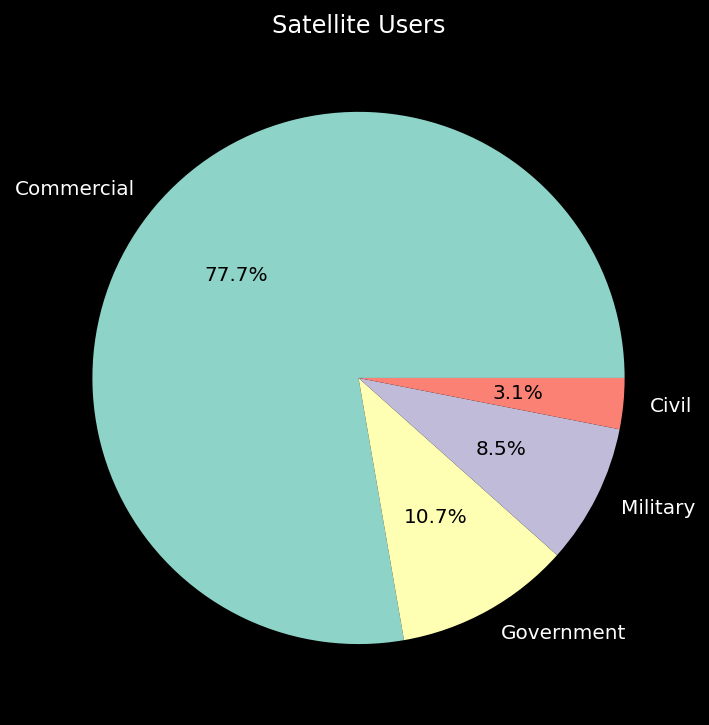

In [93]:
used_percent = []
cats = ['UsedCommercial', 'UsedGovernment','UsedMilitary', 'UsedCivil']
for x in cats:
  used_percent.append(100*sum(df[x])/len(df))
plt.style.use("dark_background")
plt.figure(figsize=(6,6))

# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
def func(pct):
    absolute = int(np.round(pct/100.*np.sum(used_percent)))
    return f"{pct:.1f}%"


# https://stackoverflow.com/questions/27898830/python-how-to-change-autopct-text-color-to-be-white-in-a-pie-chart
_, _, autotexts = plt.pie(labels=['Commercial','Government','Military','Civil'],x=used_percent, autopct=func)
for autotext in autotexts:
    autotext.set_color('black')

plt.title('Satellite Users')
plt.show()


What are the satellites' primary purposes?

In [94]:
def plot_word_cloud_dict(d, title):
  wordcloud = WordCloud(collocations=False,width=1600, height=800, prefer_horizontal=1).generate_from_frequencies(d)

  # plot the WordCloud image
  plt.figure(figsize=(16,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title(title)
  plt.show()


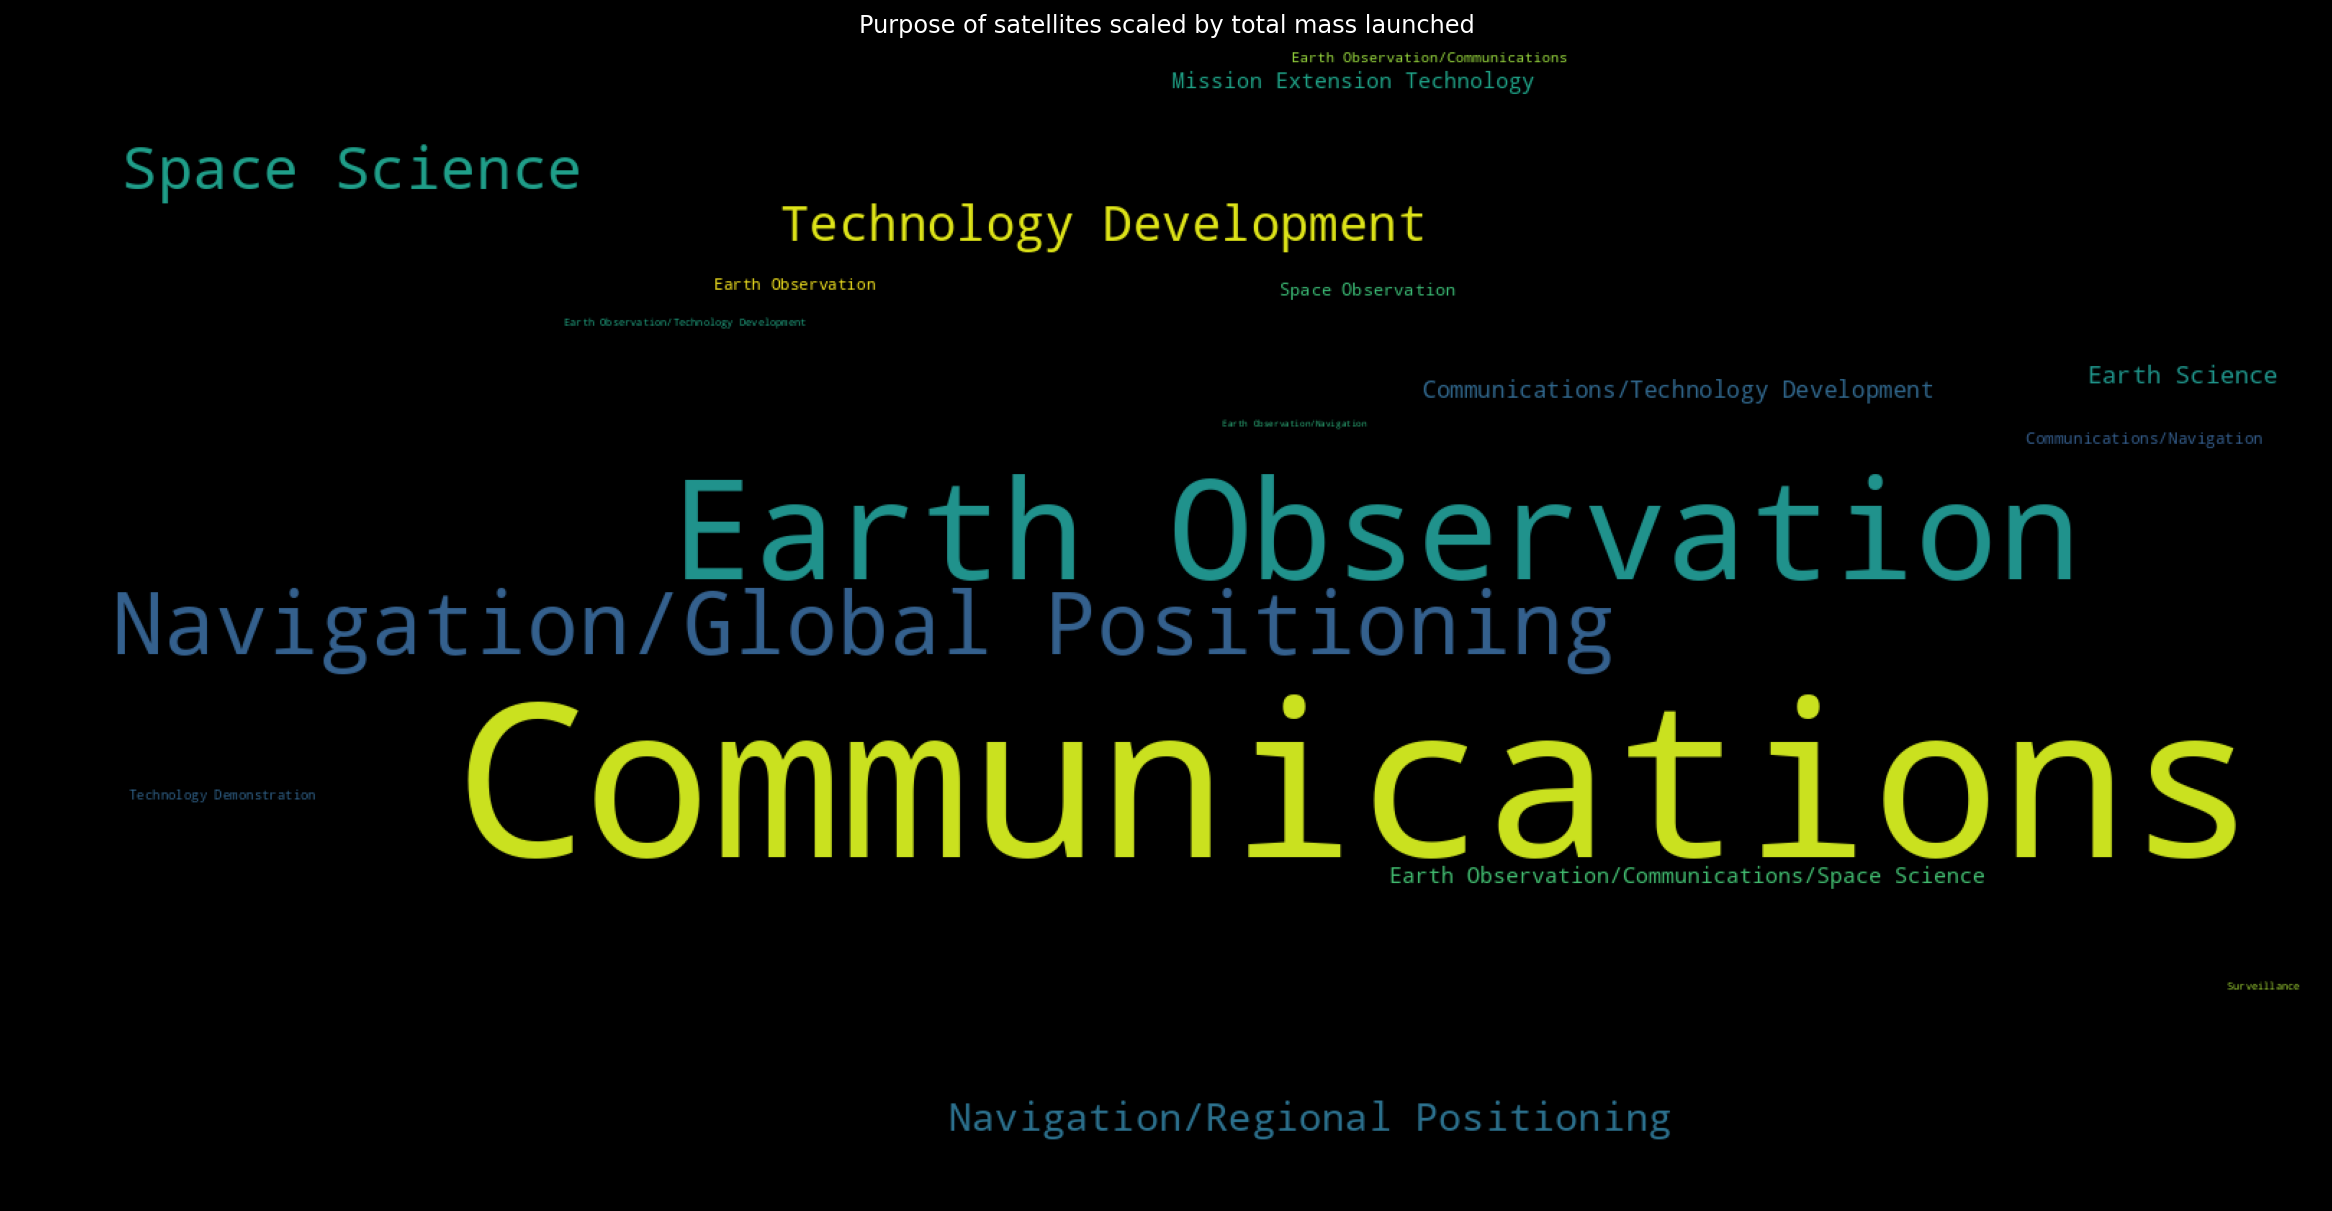

In [95]:
mass_purpose_df = df[['Purpose','MassKg']].groupby(['Purpose']).sum()
mass_purpose_df = mass_purpose_df[mass_purpose_df['MassKg'] > 0]
mass_purpose_df['MassKg'] = mass_purpose_df['MassKg'].astype(int)
mass_purpose_dict = mass_purpose_df.to_dict(index=['Purpose'])['MassKg']
mass_purpose_dict

plot_word_cloud_dict(mass_purpose_dict,'Purpose of satellites scaled by total mass launched')


What is the distribution of satellites by their launch year?¶

In [96]:
# First count number of launches of each type of satellite to date
df['AggValue'] = 1
has_launch_date_df = df.dropna(subset='LaunchYear')
has_launch_date_year_counts = has_launch_date_df.pivot_table(values='AggValue', index='LaunchYear', columns='Purpose', aggfunc=np.sum).cumsum()

end_counts = has_launch_date_year_counts[has_launch_date_year_counts.index == 2022]
end_counts = end_counts.sort_values(by=2022,axis=1,ascending=False)
end_counts


Purpose     Communications  Earth Observation  Technology Development  Navigation/Global Positioning  Space Science  Technology Demonstration  Earth Science  Surveillance  Unknown  Earth Observation/Navigation  Space Observation  Technology  Development  Communications/Maritime Tracking  Communications/Navigation  Communications/Technology Development  Earth Observation   Earth Observation/Communications  Earth Observation/Communications/Space Science  Earth Observation/Earth Science  Earth Observation/Space Science  Earth Observation/Technology Development  Earth Science/Earth Observation  Earth/Space Observation  Educational  Mission Extension Technology  Navigation/Regional Positioning  Platform  Satellite Positioning  Space Science/Technology Demonstration  Space Science/Technology Development  Technology Development/Educational
LaunchYear                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
2022                4811.0             1139.0                   366.0                          141.0           98.0                      42.0           22.0          14.0     10.0                           9.0                9.0                      1.0                               NaN                        NaN                                    NaN                 NaN                               NaN                                             NaN                              NaN                              NaN                                       NaN                              NaN                      NaN          NaN                           NaN                              NaN       NaN                    NaN                                     NaN                                   NaN                                 NaN

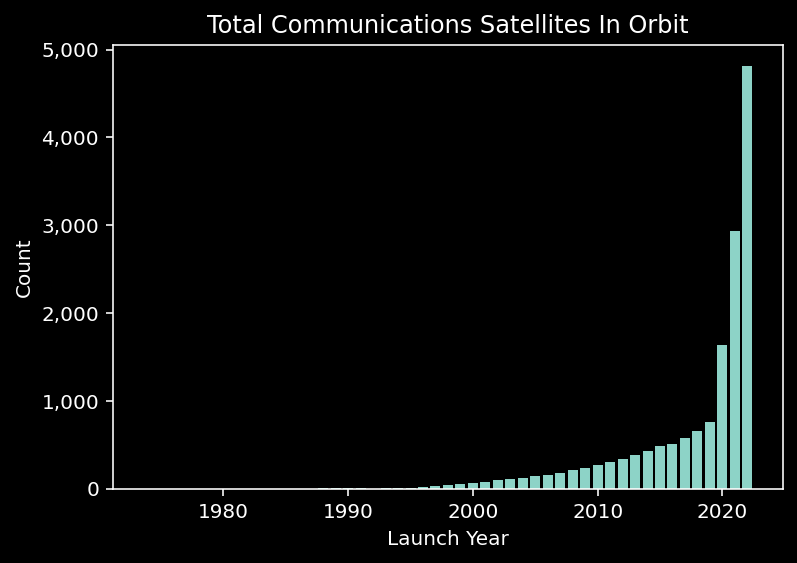

In [97]:
# Now plot total satellites in orbit over time for each top category
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(x=has_launch_date_year_counts.index, height=has_launch_date_year_counts['Communications'])
plt.xlabel('Launch Year')
plt.ylabel('Count')
plt.title('Total Communications Satellites In Orbit')
plt.style.use("dark_background")
# https://stackoverflow.com/questions/25973581/how-to-format-axis-number-format-to-thousands-with-a-comma
thousands_format = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(thousands_format)
plt.show()

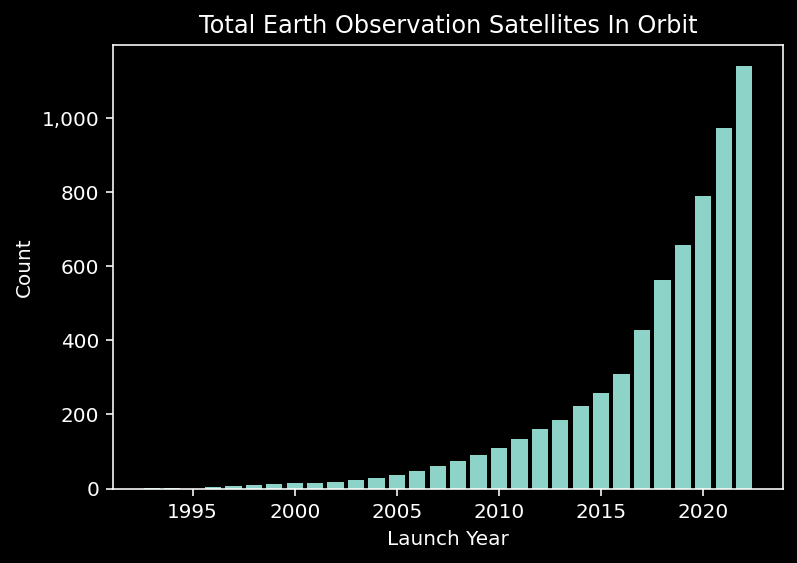

In [98]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(x=has_launch_date_year_counts.index, height=has_launch_date_year_counts['Earth Observation'])
plt.xlabel('Launch Year')
plt.ylabel('Count')
plt.title('Total Earth Observation Satellites In Orbit')
plt.style.use("dark_background")
ax.yaxis.set_major_formatter(thousands_format)
plt.show()

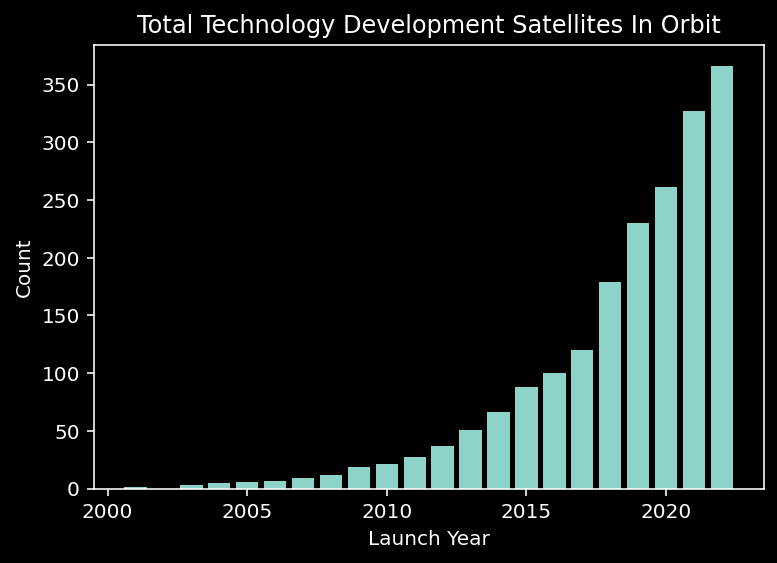

In [99]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(x=has_launch_date_year_counts.index, height=has_launch_date_year_counts['Technology Development'])
plt.xlabel('Launch Year')
plt.ylabel('Count')
plt.title('Total Technology Development Satellites In Orbit')
plt.style.use("dark_background")
ax.yaxis.set_major_formatter(thousands_format)
plt.show()

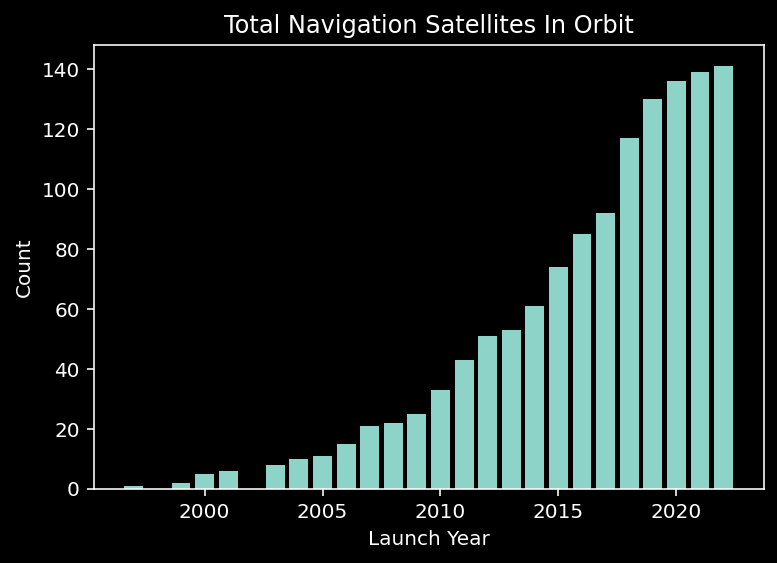

In [100]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(x=has_launch_date_year_counts.index, height=has_launch_date_year_counts['Navigation/Global Positioning'])
plt.xlabel('Launch Year')
plt.ylabel('Count')
plt.title('Total Navigation Satellites In Orbit')
plt.style.use("dark_background")
ax.yaxis.set_major_formatter(thousands_format)
plt.show()

Who operates/owns most of the satellites?

In [101]:
countries = df['Country of Operator/Owner'].value_counts()
top_countries = countries[:35]
# need to map each name to a different color
palette = ['#00ff00',
          '#8a2be2',
          '#f4a460',
          '#dc143c',
          '#0000ff',
          '#da70d6',
          '#ff00ff',
          '#1e90ff',
          '#00ff7f',
          '#db7093',
          '#f0e68c',
          '#fa8072',
          '#b0e0e6',
          '#ff1493',
          '#7b68ee',
          '#98fb98',
          '#7fffd4',
          '#ffc0cb',
          '#696969',
          '#556b2f',
          '#8b0000',
          '#808000',
          '#483d8b',
          '#008000',
          '#3cb371',
          '#008080',
          '#4682b4',
          '#9acd32',
          '#00008b',
          '#7f007f',
          '#d2b48c',
          '#ff4500',
          '#00ced1',
          '#ffa500',
          '#ffd700']

countries_colors = dict(zip(top_countries.keys(),palette))

df['Color'] = df['Country of Operator/Owner'].map(countries_colors)

# https://stackoverflow.com/questions/61919884/mapping-wordcloud-color-to-a-value-for-sentiment-analysis
# https://stackoverflow.com/questions/70883110/python-wordcloud-how-to-make-the-word-colour-based-on-a-data-column
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, words_to_colors, column1, column2, default_color):
        self.word_to_color = words_to_colors
        self.default_color = default_color
        self.column1 = column1
        self.column2 = column2

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(df[df[self.column1] == word][self.column2].value_counts().keys()[0], self.default_color)


In [102]:
def plot_word_cloud_dict_colormapped(d, color_fun, title, offset):
  wordcloud = WordCloud(collocations=False,width=1600, height=800, prefer_horizontal=1, min_font_size=6).generate_from_frequencies(d)
  wordcloud.recolor(color_func=color_fun)
  # plot the WordCloud image
  plt.figure(figsize=(14,10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(title)
  legend_elements = [Patch(facecolor=list(color_fun.word_to_color.values())[:26][i],label=list(color_fun.word_to_color.keys())[:26][i]) for i in range(26)]
  plt.legend(handles=legend_elements,bbox_to_anchor=(offset, 1))
  plt.show()


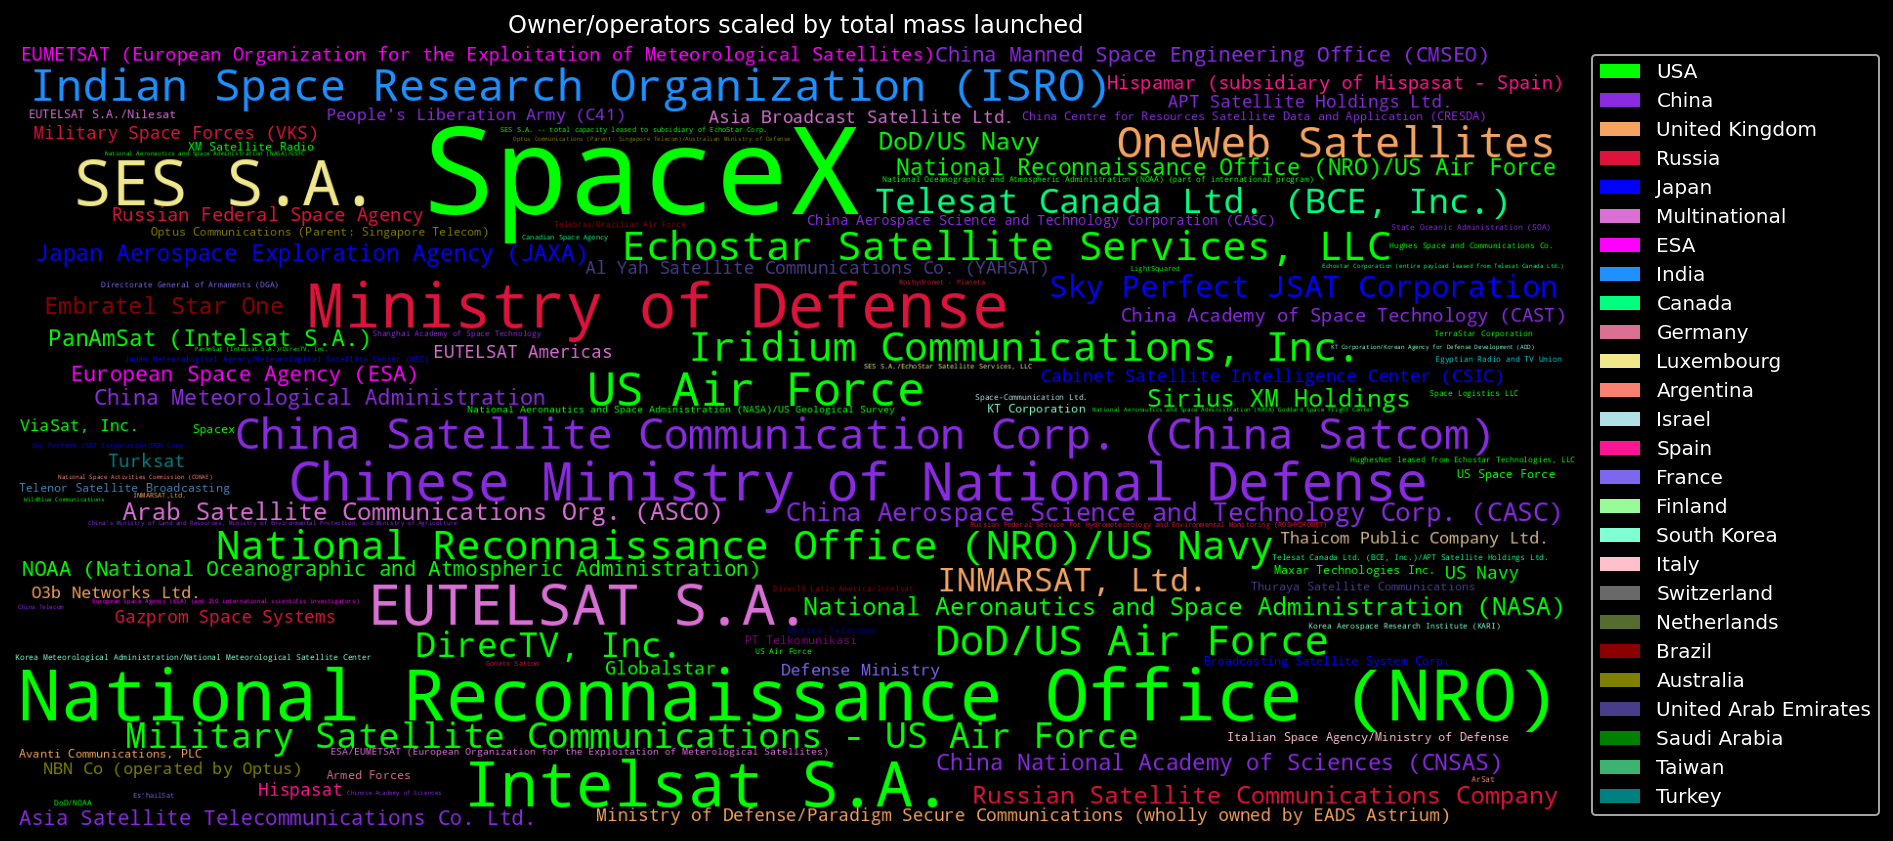

In [103]:
mass_owner_df = df[['Operator/Owner','MassKg']].groupby(['Operator/Owner']).sum()
mass_owner_df = mass_owner_df[mass_owner_df['MassKg'] > 0]
mass_owner_df['MassKg'] = mass_owner_df['MassKg'].astype(int)
mass_owner_dict = mass_owner_df.to_dict(index=['Operator/Owner'])['MassKg']
mass_owner_dict

grouped_color_func_owner = SimpleGroupedColorFunc(countries_colors, 'Operator/Owner', 'Country of Operator/Owner', '#000000')

plot_word_cloud_dict_colormapped(mass_owner_dict,grouped_color_func_owner,'Owner/operators scaled by total mass launched', 1.2)


Who manufactured most of the satellites?

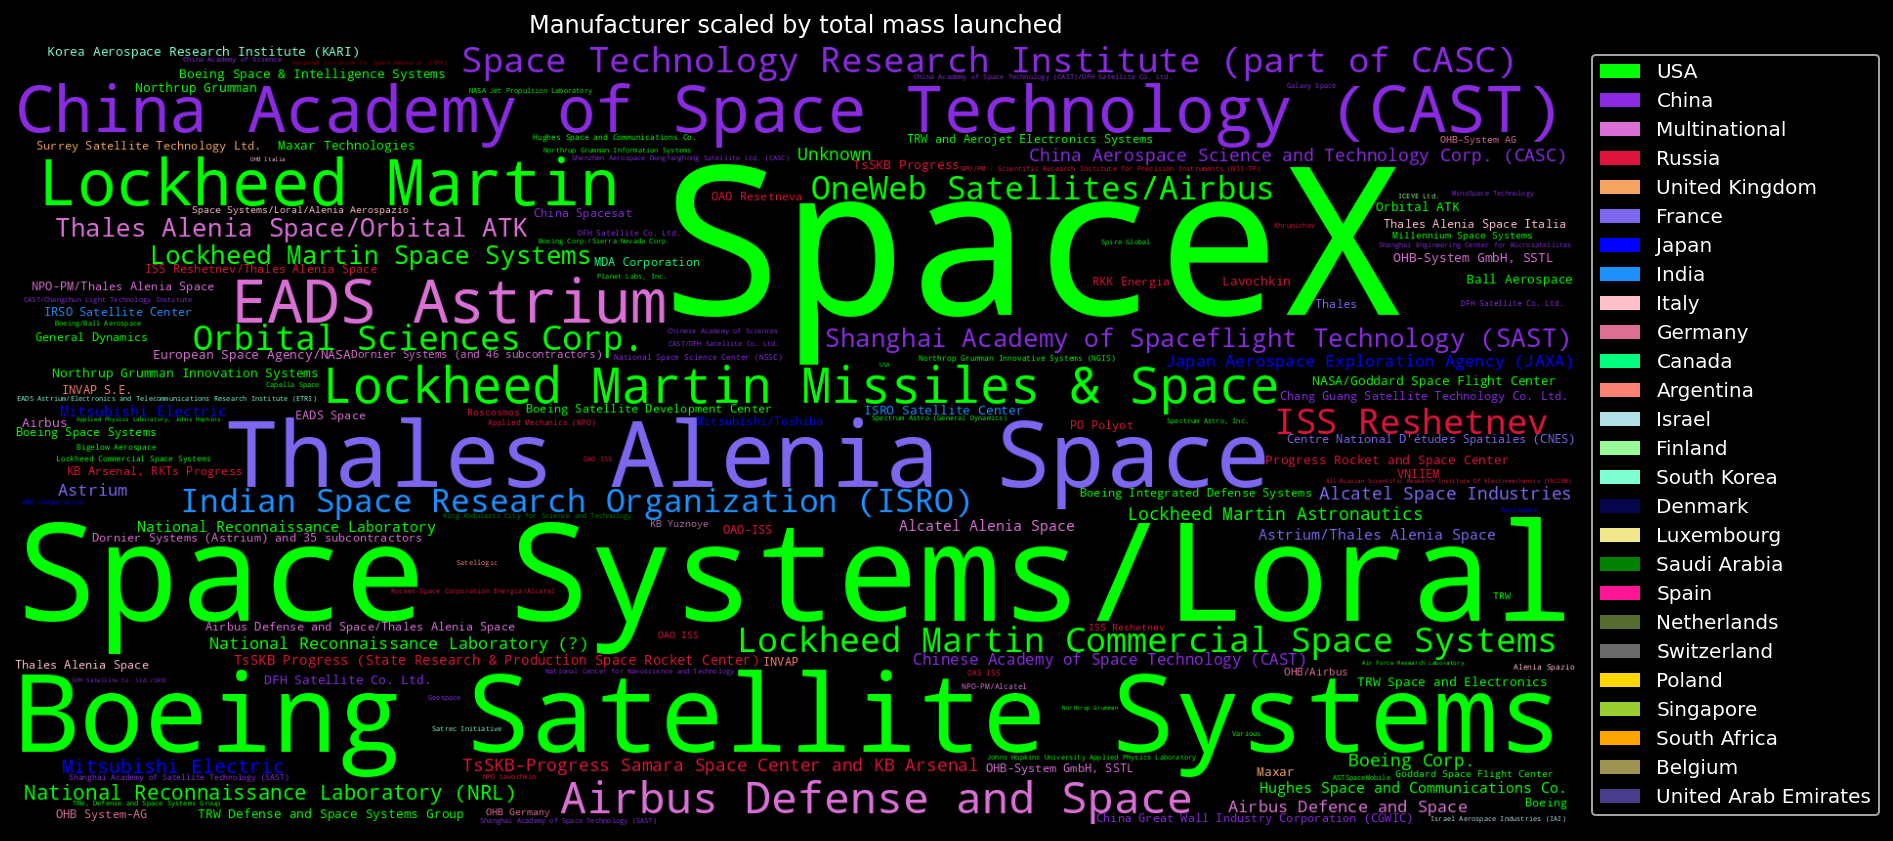

In [104]:
mass_contractor_df = df[['Contractor','MassKg']].groupby(['Contractor']).sum()
mass_contractor_df = mass_contractor_df[mass_contractor_df['MassKg'] > 0]
mass_contractor_df['MassKg'] = mass_contractor_df['MassKg'].astype(int)
mass_contractor_dict = mass_contractor_df.to_dict(index=['Contractor'])['MassKg']
mass_contractor_dict

replacement_dict = {
    'UK': 'United Kingdom',
    'International': 'Multinational',
    '/Italy': 'Italy',
    '/Thales Alenia Space': 'France',
    'France/Italy': 'Multinational',
    'France/UK/Germany/Spain':'Multinational',
    'Germany/UK':'Multinational',
    'France/UK/Germany':'Multinational',
    'Russia/France':'Multinational',
    'Germany/UK/Italy':'Multinational',
    'United States':'USA',
    'Denmark/Canada':'Multinational'
}

df['Country of Contractor'] = df['Country of Contractor'].replace(replacement_dict)

contractor_countries = df['Country of Contractor'].value_counts()
top_contractor_countries = contractor_countries[:33]
top_contractor_countries

# Maintain the color coding for countries and add other needed ones
extra_colors = {
'Denmark':'#06064c',
'Belgium':'#9d9452',
'Ukraine':'#b46fa9',
'Lithuania':'#4de091'
# '#5ac3de',
# '#07bf65',
# '#2340d2',
# '#445990',
# '#f829e9',
# '#8aa6ea',
}

palette2 = [(countries_colors[x] if x in countries_colors else extra_colors[x]) for x in top_contractor_countries.keys()]
contractor_countries_colors = dict(zip(top_contractor_countries.keys(),palette2))

grouped_color_func_contractor = SimpleGroupedColorFunc(contractor_countries_colors, 'Contractor','Country of Contractor', '#000000')

plot_word_cloud_dict_colormapped(mass_contractor_dict, grouped_color_func_contractor,'Manufacturer scaled by total mass launched', 1.2)


Which country has launched the most satellites?

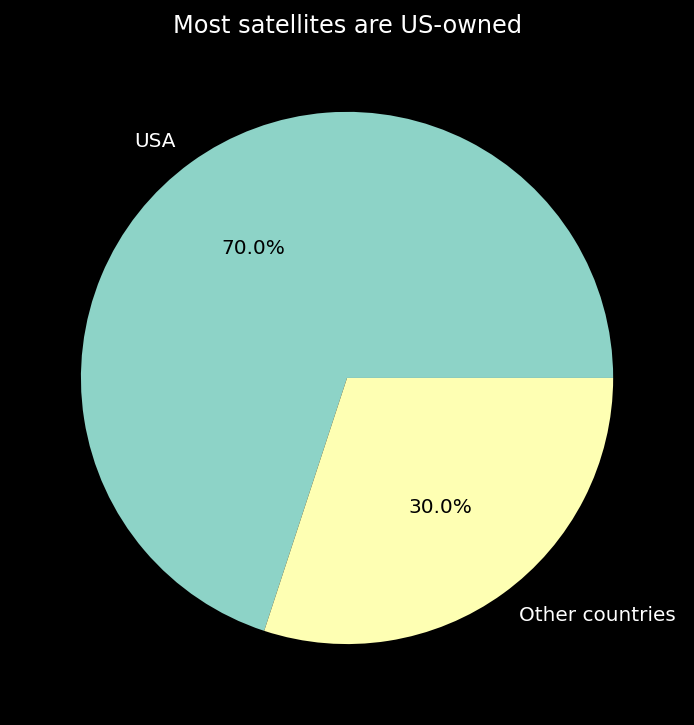

In [105]:
# has_launch_date_df = df.dropna(subset='LaunchYear')
has_launch_date_country_counts = has_launch_date_df.pivot_table(values='AggValue', index='LaunchYear', columns='Country of Operator/Owner', aggfunc=np.sum).cumsum()

end_country_counts = has_launch_date_country_counts[has_launch_date_country_counts.index == 2022]
end_country_counts = end_country_counts.sort_values(by=2022,axis=1,ascending=False)
end_country_counts

usa_tot = end_country_counts.iloc[0,0]
others_tot = end_country_counts.iloc[0,1:].sum()

used_percent = [usa_tot/(usa_tot+others_tot),others_tot/(usa_tot+others_tot)]

plt.style.use("dark_background")
plt.figure(figsize=(6,6))

# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
def func(pct):
    absolute = int(np.round(pct/100.*np.sum(used_percent)))
    return f"{pct:.1f}%"


# https://stackoverflow.com/questions/27898830/python-how-to-change-autopct-text-color-to-be-white-in-a-pie-chart
_, _, autotexts = plt.pie(labels=['USA','Other countries'],x=used_percent, autopct=func)
for autotext in autotexts:
    autotext.set_color('black')

plt.title('Most satellites are US-owned')
plt.show()


Are the expected lifetimes of satellites changing over time?

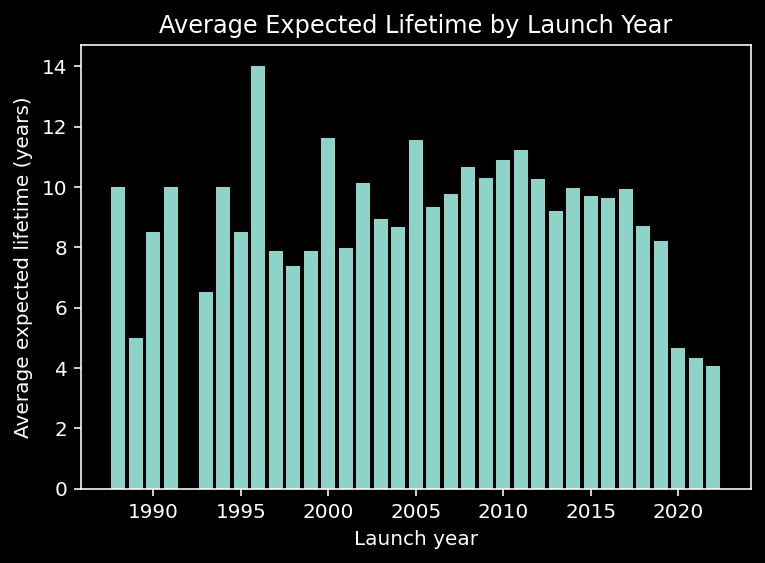

In [106]:
lifetime_mean_by_year = has_launch_date_df.pivot_table(values='Expected Lifetime (yrs.)', index='LaunchYear', aggfunc=np.mean)

# Plot average lifetime by year
plt.figure(figsize=(6,4))
ax = plt.gca()
plt.bar(x=lifetime_mean_by_year.index, height=lifetime_mean_by_year.iloc[:,0])
plt.xlabel('Launch year')
plt.ylabel('Average expected lifetime (years)')
plt.title('Average Expected Lifetime by Launch Year')
plt.show()


The expected lifetime of new satellites has been going down since roughly 2010.

# Inferential questions
The mean mass of satellites owned by US entities is less than the mean mass of all satellites.

One-tailed z-test
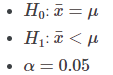


In [107]:
usa_mass = df[df['Country of Operator/Owner'] == 'USA']['MassKg']
x_bar = usa_mass.mean()
print(f'USA mean: {round(x_bar,1)} kg')
print(f'Population mean: {round(avg_mass,1)} kg')
n = len(usa_mass)
samp_std = usa_mass.std()
z_stat = (avg_mass - x_bar) / (samp_std / np.sqrt(n))
p_val = stats.norm().sf(z_stat)
print(f'p-value: {round(p_val,1)}')
alpha = 0.05
if (p_val < alpha):
  print('Reject null hypothesis at 95% significance level.')
else:
  print('Fail to reject null hypothesis.')

USA mean: 481.9 kg
Population mean: 666.2 kg
p-value: 0.0
Reject null hypothesis at 95% significance level.


The proportion of satellites with an inclination greater than 45 degrees is different between satellites owned by US and Chinese entities.

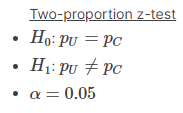

In [108]:
usa_45 = df[(df['Country of Operator/Owner'] == 'USA') & (df['InclinationDeg'] > 45)]
cn_45 = df[(df['Country of Operator/Owner'] == 'China') & (df['InclinationDeg'] > 45)]
n_u = len(df[df['Country of Operator/Owner'] == 'USA'])
n_c = len(df[df['Country of Operator/Owner'] == 'China'])
p_u = len(usa_45) / n_u
p_c = len(cn_45) / n_c
print(f'US proportion: {round(100*p_u,1)}%')
print(f'CN proportion: {round(100*p_c,1)}%')
p = (len(usa_45) + len(cn_45)) / (n_u + n_c)
test_stat = (p_u - p_c) / (np.sqrt(p * (1-p) * (1/len(usa_45) + 1/len(cn_45))))
p_val = stats.norm().sf(test_stat)
print(f'p-value: {round(p_val,1)}')
if (p_val < alpha/2):
  print('Reject null hypothesis at 95% significance level.')
else:
  print('Fail to reject null hypothesis.')


US proportion: 92.6%
CN proportion: 74.0%
p-value: 0.0
Reject null hypothesis at 95% significance level.


# Recommendations
Enhance satellite collision avoidance systems.

Promote de-orbiting mechanisms for end-of-life of satellites.

Invest in research and development for satellite durability and longevity.

# 5. Predict the Purpose of a Satellite

In [109]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from lightgbm import LGBMClassifier
import warnings
import logging
import pickle

In [110]:
file_path = '/content/UCS-Satellite-Database-Officialname-1-1-2023.csv'

In [111]:
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
detected_encoding = result['encoding']
print(f"Detected encoding: {detected_encoding}")

sat_df = pd.read_csv(file_path, encoding=detected_encoding)
sat_df.head()


Detected encoding: Windows-1252


Current Official Name of Satellite Country/Org of UN Registry Country of Operator/Owner                 Operator/Owner       Users                 Purpose                       Detailed Purpose Class of Orbit       Type of Orbit  Longitude of GEO (degrees) Perigee (km) Apogee (km)  Eccentricity Inclination (degrees) Period (minutes) Launch Mass (kg.)  Dry Mass (kg.)  Power (watts) Date of Launch  Expected Lifetime (yrs.)                Contractor Country of Contractor                 Launch Site Launch Vehicle COSPAR Number  NORAD Number                                                                               Comments Unnamed: 27 Source Used for Orbital Data                                                                                                        Source                  Source.1                                                       Source.2  \
0                         1HOPSAT-TD                         NR                       USA                   Hera Systems  Commercial       Earth Observation                       Infrared Imaging            LEO  Non-Polar Inclined                         0.0          566         576      0.001510                  36.9            96.08                22              NaN           NaN     11-12-2019                       0.5              Hera Systems                   USA  Satish Dhawan Space Centre           PSLV     2019-089H         44859                                Pathfinder for planned earth observation constellation.         NaN                JMSatcat/3_20           https://spaceflightnow.com/2019/12/11/indias-50th-pslv-lifts-off-with-satellites-from-five-nations/  https://www.herasys.com/                                                            NaN   
1                            Aalto-1                    Finland                   Finland               Aalto University       Civil  Technology Development                                    NaN            LEO     Sun-Synchronous                         0.0          497         517      0.001450                 97.45             94.7                 5              NaN          4.50     23-06-2017                       2.0          Aalto University               Finland  Satish Dhawan Space Centre           PSLV     2017-036L         42775                                                  Technology development and education.         NaN               JMSatcat/10_17                                      https://directory.eoportal.org/web/eoportal/satellite-missions/a/aalto-1                       NaN                 http://www.planet4589.org/space/log/satcat.txt   
2                              AAt-4                    Denmark                   Denmark          University of Aalborg       Civil       Earth Observation  Automatic Identification System (AIS)            LEO     Sun-Synchronous                         0.0          442         687      0.001510                  98.2             95.9                 1              NaN           NaN     25-04-2016                       NaN     University of Aalborg               Denmark         Guiana Space Center     Soyuz-2.1a     2016-025E         41460                                                                    Carries AIS system.         NaN                      Space50  http://spaceflightnow.com/2016/04/26/soyuz-blasts-off-with-environmental-satellite-general-relativity-probe/                       NaN        http://space50.org/objekt.php?mot=2016-025E&jazyk=pp_en   
3                              ABS-2                         NR             Multinational  Asia Broadcast Satellite Ltd.  Commercial          Communications                                    NaN            GEO                 NaN                        75.0       35,778      35,793      0.000178                  0.08          1436.03             6,330              NaN     16,000.00     06-02-2014                      15.0       Space Systems/Loral                   USA         Guiana Space Ce

In [112]:
sat_df = sat_df.loc[:, ~sat_df.columns.str.contains('^Unnamed')]

In [113]:
sat_df = sat_df.loc[:, ~sat_df.columns.str.contains('^Source')]


In [114]:
sat_df = sat_df.loc[:, ~sat_df.columns.str.contains('^Comments')]


In [115]:
column_names = sat_df.columns
column_names


Index(['Current Official Name of Satellite', 'Country/Org of UN Registry', 'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose', 'Detailed Purpose', 'Class of Orbit', 'Type of Orbit', 'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)', 'Eccentricity', 'Inclination (degrees)', 'Period (minutes)', 'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)', 'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor', 'Country of Contractor', 'Launch Site', 'Launch Vehicle', 'COSPAR Number', 'NORAD Number'], dtype='object')

In [116]:
#some copies
sat_df2 = sat_df.copy()
sat_df3 = sat_df.copy()


In [117]:
unique_purposes = sat_df['Purpose'].unique()
print("Unique Purposes:", unique_purposes)


Unique Purposes: ['Earth Observation' 'Technology Development' 'Communications'
 'Earth Science' 'Space Science' 'Space Science/Technology Demonstration'
 'Communications/Technology Development'
 'Communications/Maritime Tracking' 'Technology Demonstration' 'Unknown'
 'Navigation/Global Positioning'
 'Earth Observation/Technology Development' 'Earth Observation '
 'Earth Observation/Communications' 'Earth/Space Observation'
 'Educational' 'Earth Observation/Earth Science' 'Platform'
 'Earth Observation/Space Science' 'Earth Observation/Navigation'
 'Communications/Navigation' 'Space Observation' 'Surveillance'
 'Navigation/Regional Positioning' 'Space Science/Technology Development'
 'Mission Extension Technology' 'Earth Science/Earth Observation'
 'Earth Observation/Communications/Space Science'
 'Technology  Development' 'Technology Development/Educational'
 'Satellite Positioning']


In [118]:
#feature selection for predicting 'Purpose'
features = ['Country/Org of UN Registry', 'Country of Operator/Owner', 'Operator/Owner',
            'Eccentricity', 'Users', 'Perigee (km)', 'Class of Orbit', 'Type of Orbit',
            'Inclination (degrees)', 'Period (minutes)', 'Launch Mass (kg.)', 'Power (watts)',
            'Launch Site', 'Expected Lifetime (yrs.)']

target = 'Purpose'

sat_df.dropna(subset=features, inplace=True)


In [119]:
#separate categorical and numerical features
categorical_features = [col for col in features if sat_df[col].dtype == 'object']
numerical_features = [col for col in features if sat_df[col].dtype != 'object']

#transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X1 = preprocessor.fit_transform(sat_df[features])

label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(sat_df[target])


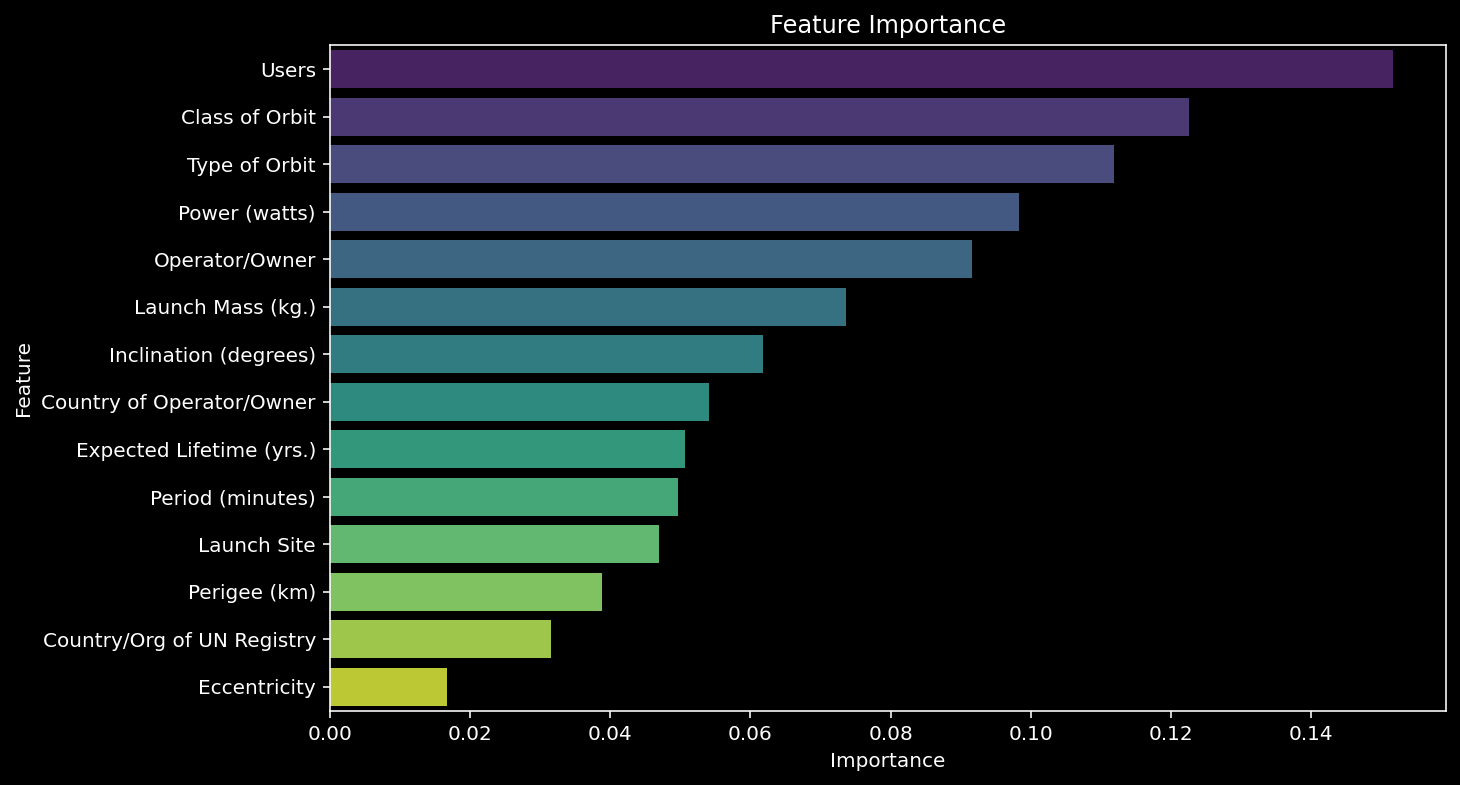

In [120]:
#RandomForest classifier
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X1, y1)

importances = model1.feature_importances_

encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_feature_names)

#mapping from encoded feature names back to their original names
feature_mapping = {feature: feature for feature in numerical_features}
for original_feature in categorical_features:
    for encoded_feature in encoded_feature_names:
        if encoded_feature.startswith(original_feature):
            feature_mapping[encoded_feature] = original_feature

mapped_feature_names = [feature_mapping[feature] for feature in feature_names]

#aggregate feature importances by original feature names
feature_importance_df = pd.DataFrame({'Feature': mapped_feature_names, 'Importance': importances})
feature_importance_agg = feature_importance_df.groupby('Feature').sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_agg.sort_values(by='Importance', ascending=False), palette='viridis')
plt.title('Feature Importance')
plt.show()


Above chart shows that 'Users', 'Class of Orbit', 'Type of Orbit', and 'Power (watts)' appear to be the top features for predicting 'Purpose'



We have a lot of categorical data, so let's use LightGBM (Light Gradient-Boosting Machine): A fast, distributed, high performance gradient boosting (GBT, GBDT, GBRT, GBM or MART) framework based on decision tree algorithms, used for ranking, classification and many other machine learning tasks.



In [121]:
selected_features2 = ['Users', 'Class of Orbit', 'Type of Orbit', 'Power (watts)']
target2 = 'Purpose'

sat_df2.dropna(subset=selected_features2 + [target2], inplace=True)

#convert numerical columns to numeric types
sat_df2['Power (watts)'] = pd.to_numeric(sat_df2['Power (watts)'], errors='coerce')
sat_df2.dropna(subset=['Power (watts)'], inplace=True)

#encode categorical features
label_encoders = {}
for col in ['Users', 'Class of Orbit', 'Type of Orbit']:
    le = LabelEncoder()
    sat_df2[col] = le.fit_transform(sat_df2[col])
    label_encoders[col] = le

#encode target variable
le_target = LabelEncoder()
sat_df2[target2] = le_target.fit_transform(sat_df2[target2])


In [122]:
#class distribution
class_counts = sat_df2[target2].value_counts()
print("Class distribution before removing rare classes:\n", class_counts)

#remove classes with too few samples
sat_df2 = sat_df2[sat_df2[target2].isin(class_counts[class_counts > 5].index)]

#class distribution again
class_counts = sat_df2[target2].value_counts()
print("Class distribution after removing rare classes:\n", class_counts)


Class distribution before removing rare classes:
 Purpose
0    150
2     39
6     11
8     10
3      3
4      3
7      2
1      1
5      1
Name: count, dtype: int64
Class distribution after removing rare classes:
 Purpose
0    150
2     39
6     11
8     10
Name: count, dtype: int64


In [123]:
#ignore warnings and loggings
warnings.filterwarnings("ignore")
logging.getLogger("lightgbm").setLevel(logging.ERROR)

X2 = sat_df2[selected_features2]
y2 = sat_df2[target2]

#feature engineering
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler())
])

X2 = pipeline.fit_transform(X2)

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

#model
lgb_model = LGBMClassifier(
    objective='multiclass',
    num_class=len(le_target.classes_),
    random_state=42,
    verbosity=-1,
    class_weight='balanced' #balance classes
)

#parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'n_estimators': [100, 200, 500],
    'boosting_type': ['gbdt', 'dart']
}

#GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)


Best parameters found:  {'boosting_type': 'dart', 'learning_rate': 0.1, 'n_estimators': 500, 'num_leaves': 31}


In [124]:
#predict on the test set
y_pred = best_model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print("Classification Report:\n", report)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           2       0.89      1.00      0.94         8
           6       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2

    accuracy                           0.98        42
   macro avg       0.97      0.88      0.90        42
weighted avg       0.98      0.98      0.97        42

Accuracy: 97.62%


In [125]:
#save the model and pipeline
with open('purpose_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)


In [126]:
#load the model and pipeline
with open('purpose_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)


In [127]:
#dummy data
dummy_data_list = [
    {'Users': 'Government', 'Class of Orbit': 'LEO', 'Type of Orbit': 'Polar', 'Power (watts)': 608},              #Should be: Earth Observation
    {'Users': 'Government', 'Class of Orbit': 'LEO', 'Type of Orbit': 'Sun-Synchronous', 'Power (watts)': 1100},   #Should be: Earth Observation
    {'Users': 'Military', 'Class of Orbit': 'LEO', 'Type of Orbit': 'Polar', 'Power (watts)': 300},                #Should be: Communications
    {'Users': 'Government', 'Class of Orbit': 'LEO', 'Type of Orbit': 'Sun-Synchronous', 'Power (watts)': 1200}    #Should be: Earth Observation
]

dummy_data = pd.DataFrame(dummy_data_list)

#encode dummy data
for col in ['Users', 'Class of Orbit', 'Type of Orbit']:
    dummy_data[col] = label_encoders[col].transform(dummy_data[col])

#transform dummy data using the pipeline
dummy_data_transformed = loaded_pipeline.transform(dummy_data)

#predictions
dummy_pred = loaded_model.predict(dummy_data_transformed)
dummy_pred_labels = le_target.inverse_transform(dummy_pred)

for i, pred in enumerate(dummy_pred_labels):
    print(f"Predicted Purpose for dummy data set {i + 1}: {pred}")


Predicted Purpose for dummy data set 1: Earth Observation
Predicted Purpose for dummy data set 2: Earth Observation
Predicted Purpose for dummy data set 3: Communications
Predicted Purpose for dummy data set 4: Earth Observation
